In [5]:
import pandas as pd
import numpy as np

vehicle_df = pd.read_csv("sample.csv")
vehicle_df.head()


,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Temperature,Humidity,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level,NOx_AQI,SO2_AQI,PM2.5_AQI,AQI_Category,AQI_Category_pm,AQI_Category_SO2
0,Motorcycle,Electric,2.747609,22,13.880458,52.883905,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,Medium,1356.899755,28.669696,19.246603,Hazardous,Good,Good
1,Bus,Electric,5.743714,3,19.136947,5.697343,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,Medium,1607.035508,35.026725,311.853493,Hazardous,Hazardous,Good
2,Bus,Hybrid,4.606368,17,8.123428,3.953116,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,High,322.735709,94.167028,220.663582,Hazardous,Very Unhealthy,Moderate
3,Truck,Electric,3.913024,4,35.994893,0.509678,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,High,1301.194706,31.654917,277.208710,Hazardous,Very Unhealthy,Good
4,Truck,Hybrid,1.611297,15,14.793481,52.450884,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,Low,1979.238064,31.232956,130.071798,Hazardous,Unhealthy for Sensitive Groups,Good


In [7]:
# Import required library
import pandas as pd

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset.csv')

# Filter rows where Engine Size is within the range 0 to 8 litres
df_filtered = df[df['Engine Size'].between(0, 8)]

# Save the filtered dataset to a new CSV file
df_filtered.to_csv('vehicle_emission_dataset_filtered.csv', index=False)

# Display the first few rows to verify
print(df_filtered.head())

# Display the number of rows in the new dataset
print(f"New dataset contains {len(df_filtered)} rows.")
print("New CSV file 'vehicle_emission_dataset_filtered.csv' has been created with Engine Size values between 0 and 8.")

  Vehicle Type Fuel Type  Engine Size  Age of Vehicle  Temperature   Humidity  \
0   Motorcycle  Electric     2.747609              22    13.880458  52.883905   
1          Bus  Electric     5.743714               3    19.136947   5.697343   
2          Bus    Hybrid     4.606368              17     8.123428   3.953116   
3        Truck  Electric     3.913024               4    35.994893   0.509678   
4        Truck    Hybrid     1.611297              15    14.793481  52.450884   

   Air Pressure  CO2 Emissions  NOx Emissions     NOx_AQI  \
0    955.411642     179.930088       1.085520  102.428753   
1   1035.763062     250.505219       1.285628  106.214591   
2    976.207064     404.979103       0.258189   24.357412   
3    966.919462     463.568608       1.040956  101.585650   
4    953.229351      79.514604       1.583390  111.847927   

                     AQI_Category  
0  Unhealthy for Sensitive Groups  
1  Unhealthy for Sensitive Groups  
2                            Good  
3 

C:\Users\SKB PC\AppData\Local\Temp\ipykernel_12084\595745740.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

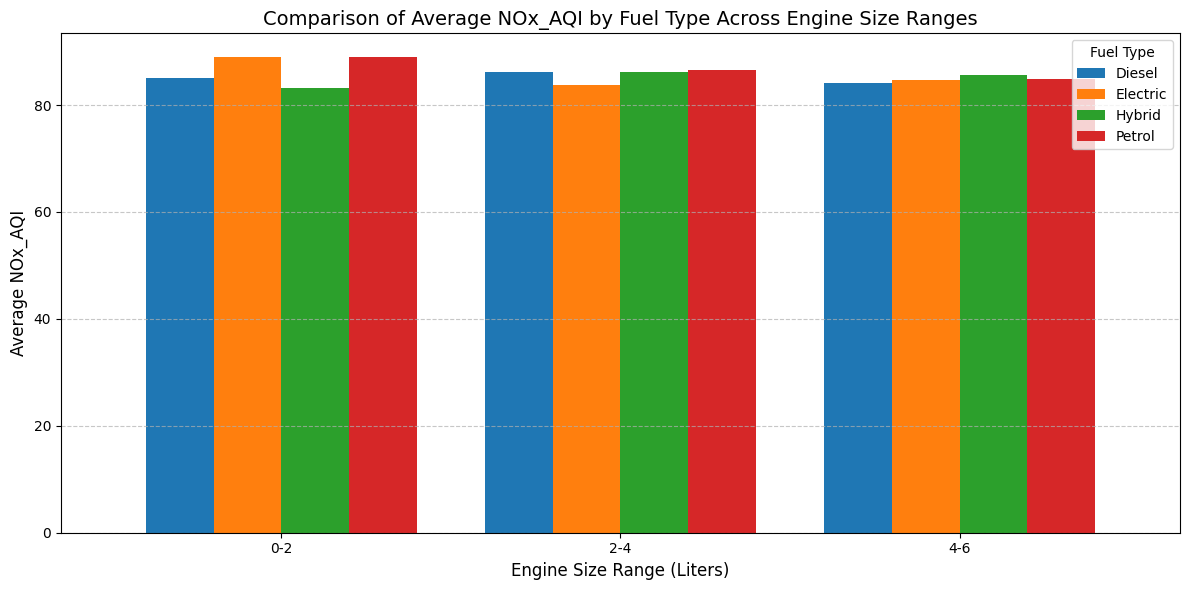


Average NOx_AQI by Engine Size Range and Fuel Type:
Fuel Type             Diesel   Electric     Hybrid     Petrol
Engine_Size_Range                                            
0-2                85.098372  88.962119  83.273634  88.892742
2-4                86.264479  83.699541  86.135524  86.500167
4-6                84.116254  84.650234  85.681804  84.900894

Conclusion:
Based on the grouped bar plot and average NOx_AQI values:

For Engine Size Range 0-2:
- EV vs Diesel: EVs have higher NOx_AQI (88.96) compared to Diesel (85.10).
- EV vs Petrol: EVs have higher NOx_AQI (88.96) compared to Petrol (88.89).
- EV vs Hybrid: EVs have higher NOx_AQI (88.96) compared to Hybrid (83.27).

For Engine Size Range 2-4:
- EV vs Diesel: EVs have lower NOx_AQI (83.70) compared to Diesel (86.26).
- EV vs Petrol: EVs have lower NOx_AQI (83.70) compared to Petrol (86.50).
- EV vs Hybrid: EVs have lower NOx_AQI (83.70) compared to Hybrid (86.14).

For Engine Size Range 4-6:
- EV vs Diesel: EVs have high

In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Filter rows where Engine Size is within the range 0 to 8
df_filtered = df[df['Engine Size'].between(0, 8)]

# Define bins and labels for Engine Size categorization
bins = [0, 2, 4, 6]
labels = ['0-2', '2-4', '4-6']
df_filtered['Engine_Size_Range'] = pd.cut(df_filtered['Engine Size'], bins=bins, labels=labels, include_lowest=True)

# Filter for relevant fuel types (Electric, Diesel, Petrol, Hybrid)
fuel_types = ['Diesel', 'Electric', 'Hybrid', 'Petrol']
df_filtered = df_filtered[df_filtered['Fuel Type'].isin(fuel_types)]

# Group by Engine_Size_Range and Fuel Type, and calculate mean NOx_AQI
nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
nox_aqi_means.plot(kind='bar', width=0.8, figsize=(12, 6))
plt.title('Comparison of Average NOx_AQI by Fuel Type Across Engine Size Ranges', fontsize=14)
plt.xlabel('Engine Size Range (Liters)', fontsize=12)
plt.ylabel('Average NOx_AQI', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the mean NOx_AQI values for reference
print("\nAverage NOx_AQI by Engine Size Range and Fuel Type:")
print(nox_aqi_means)

# Conclusion
print("\nConclusion:")
print("Based on the grouped bar plot and average NOx_AQI values:")
for engine_range in nox_aqi_means.index:
    print(f"\nFor Engine Size Range {engine_range}:")
    ev_nox = nox_aqi_means.loc[engine_range, 'Electric'] if 'Electric' in nox_aqi_means.columns else float('nan')
    diesel_nox = nox_aqi_means.loc[engine_range, 'Diesel'] if 'Diesel' in nox_aqi_means.columns else float('nan')
    petrol_nox = nox_aqi_means.loc[engine_range, 'Petrol'] if 'Petrol' in nox_aqi_means.columns else float('nan')
    hybrid_nox = nox_aqi_means.loc[engine_range, 'Hybrid'] if 'Hybrid' in nox_aqi_means.columns else float('nan')
    
    if not pd.isna(ev_nox) and not pd.isna(diesel_nox):
        print(f"- EV vs Diesel: EVs have {'lower' if ev_nox < diesel_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Diesel ({diesel_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(petrol_nox):
        print(f"- EV vs Petrol: EVs have {'lower' if ev_nox < petrol_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Petrol ({petrol_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(hybrid_nox):
        print(f"- EV vs Hybrid: EVs have {'lower' if ev_nox < hybrid_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Hybrid ({hybrid_nox:.2f}).")



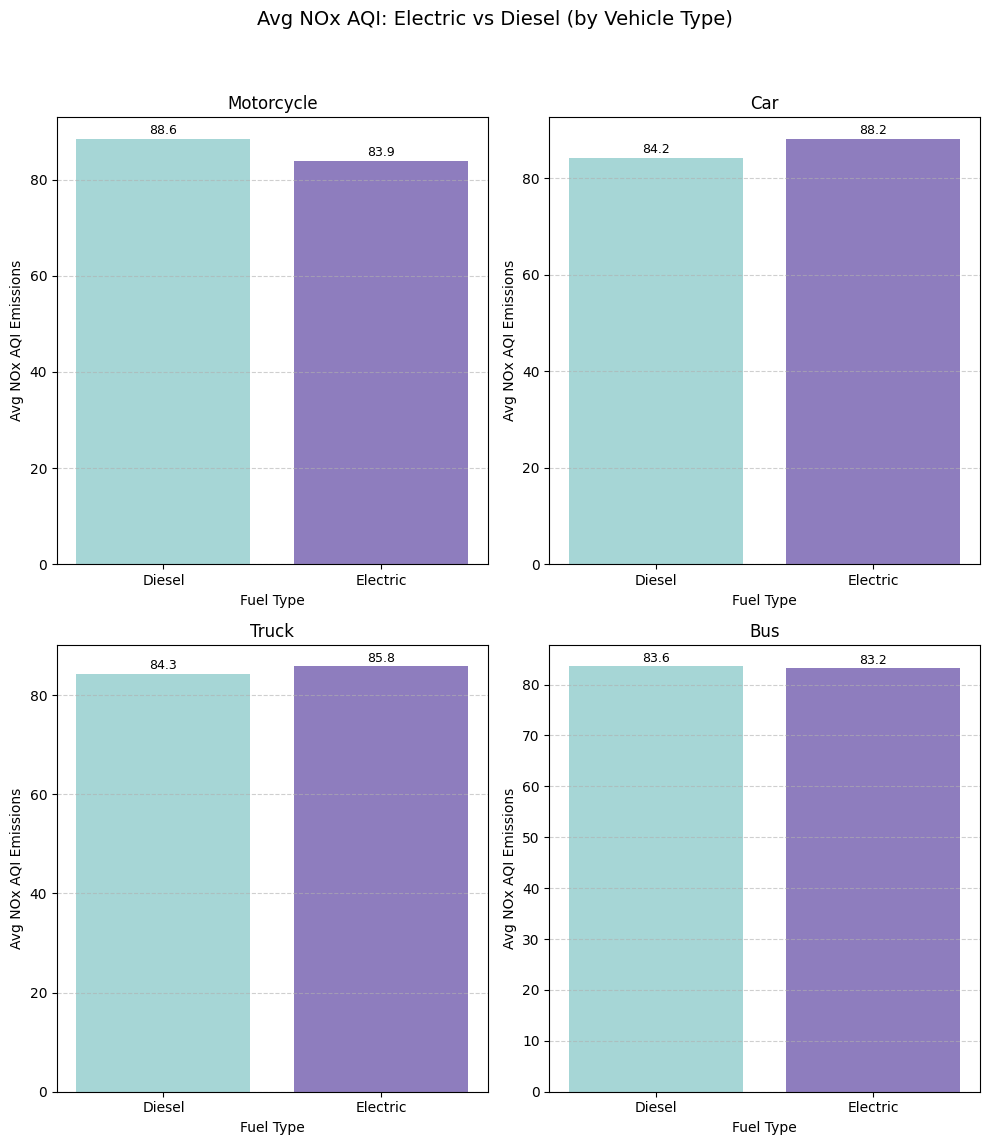


Average NOx AQI by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Diesel      88.557076
Electric    83.949337
Name: NOx_AQI, dtype: float64

Car:
Fuel Type
Diesel      84.209352
Electric    88.159813
Name: NOx_AQI, dtype: float64

Truck:
Fuel Type
Diesel      84.319363
Electric    85.831253
Name: NOx_AQI, dtype: float64

Bus:
Fuel Type
Diesel      83.618779
Electric    83.190508
Name: NOx_AQI, dtype: float64

Conclusion:
- For Motorcycle: EVs have lower NOx AQI (83.95) compared to Diesel (88.56).
- For Car: EVs have higher NOx AQI (88.16) compared to Diesel (84.21).
- For Truck: EVs have higher NOx AQI (85.83) compared to Diesel (84.32).
- For Bus: EVs have lower NOx AQI (83.19) compared to Diesel (83.62).


In [9]:
#NOx AQI
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Diesel']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
nox_aqi_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    nox_aqi_means = df_vehicle.groupby('Fuel Type')['NOx_AQI'].mean()
    nox_aqi_results[vehicle] = nox_aqi_means

    ax = axs[i]
    bars = ax.bar(nox_aqi_means.index, nox_aqi_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg NOx AQI Emissions')
    ax.set_xticks(range(len(nox_aqi_means.index)))
    ax.set_xticklabels(nox_aqi_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg NOx AQI: Electric vs Diesel (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage NOx AQI by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(nox_aqi_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_nox_aqi = nox_aqi_results[vehicle].get('Electric', float('nan'))
    diesel_nox_aqi = nox_aqi_results[vehicle].get('Diesel', float('nan'))
    
    if not pd.isna(ev_nox_aqi) and not pd.isna(diesel_nox_aqi):
        print(f"- For {vehicle}: EVs have {'lower' if ev_nox_aqi < diesel_nox_aqi else 'higher'} NOx AQI ({ev_nox_aqi:.2f}) compared to Diesel ({diesel_nox_aqi:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Diesel data missing).")


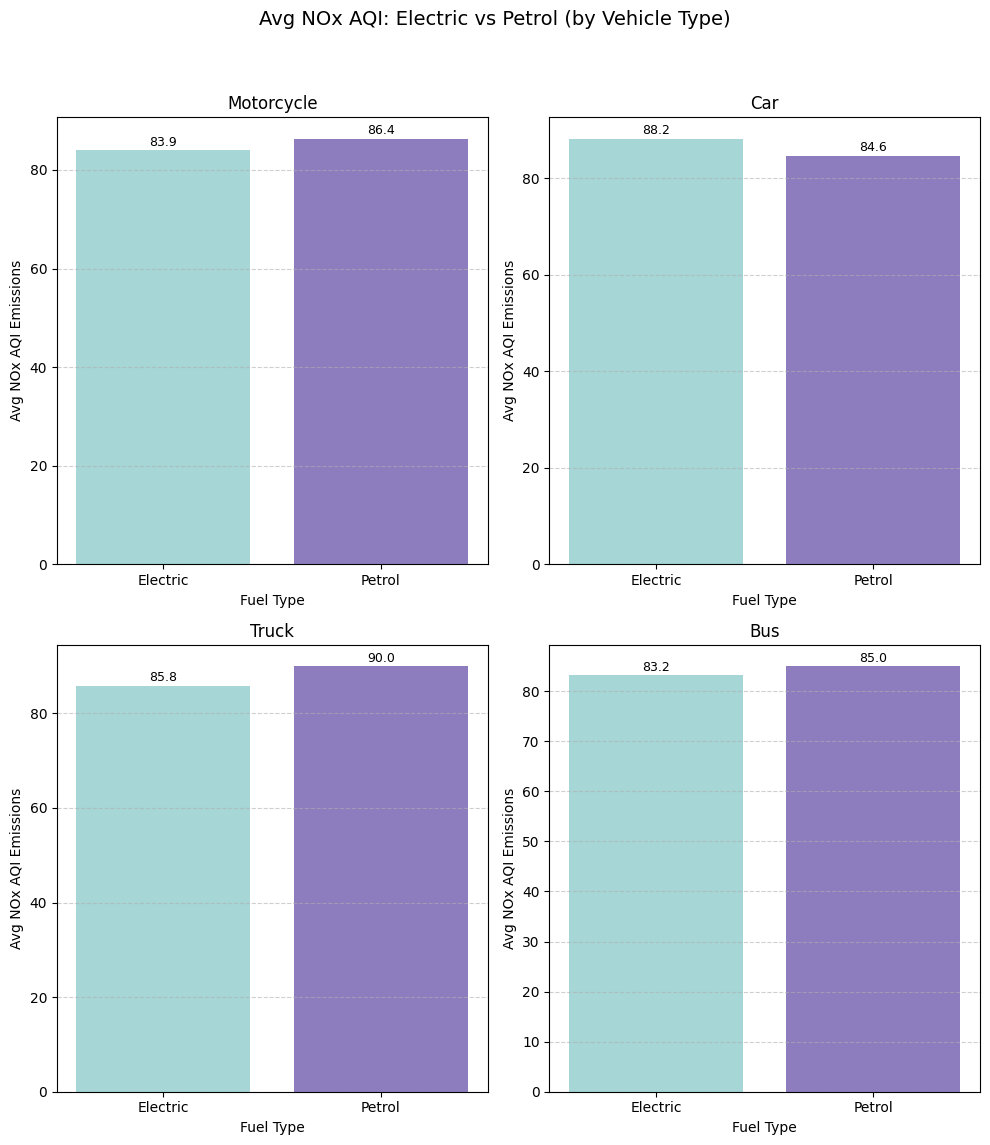


Average NOx AQI by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Electric    83.949337
Petrol      86.356185
Name: NOx_AQI, dtype: float64

Car:
Fuel Type
Electric    88.159813
Petrol      84.601416
Name: NOx_AQI, dtype: float64

Truck:
Fuel Type
Electric    85.831253
Petrol      89.981022
Name: NOx_AQI, dtype: float64

Bus:
Fuel Type
Electric    83.190508
Petrol      84.999559
Name: NOx_AQI, dtype: float64

Conclusion:
- For Motorcycle: EVs have lower NOx AQI (83.95) compared to Petrol (86.36).
- For Car: EVs have higher NOx AQI (88.16) compared to Petrol (84.60).
- For Truck: EVs have lower NOx AQI (85.83) compared to Petrol (89.98).
- For Bus: EVs have lower NOx AQI (83.19) compared to Petrol (85.00).


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Petrol']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
nox_aqi_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    nox_aqi_means = df_vehicle.groupby('Fuel Type')['NOx_AQI'].mean()
    nox_aqi_results[vehicle] = nox_aqi_means

    ax = axs[i]
    bars = ax.bar(nox_aqi_means.index, nox_aqi_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg NOx AQI Emissions')
    ax.set_xticks(range(len(nox_aqi_means.index)))
    ax.set_xticklabels(nox_aqi_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg NOx AQI: Electric vs Petrol (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage NOx AQI by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(nox_aqi_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_nox_aqi = nox_aqi_results[vehicle].get('Electric', float('nan'))
    petrol_nox_aqi = nox_aqi_results[vehicle].get('Petrol', float('nan'))
    
    if not pd.isna(ev_nox_aqi) and not pd.isna(petrol_nox_aqi):
        print(f"- For {vehicle}: EVs have {'lower' if ev_nox_aqi < petrol_nox_aqi else 'higher'} NOx AQI ({ev_nox_aqi:.2f}) compared to Petrol ({petrol_nox_aqi:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Petrol data missing).")


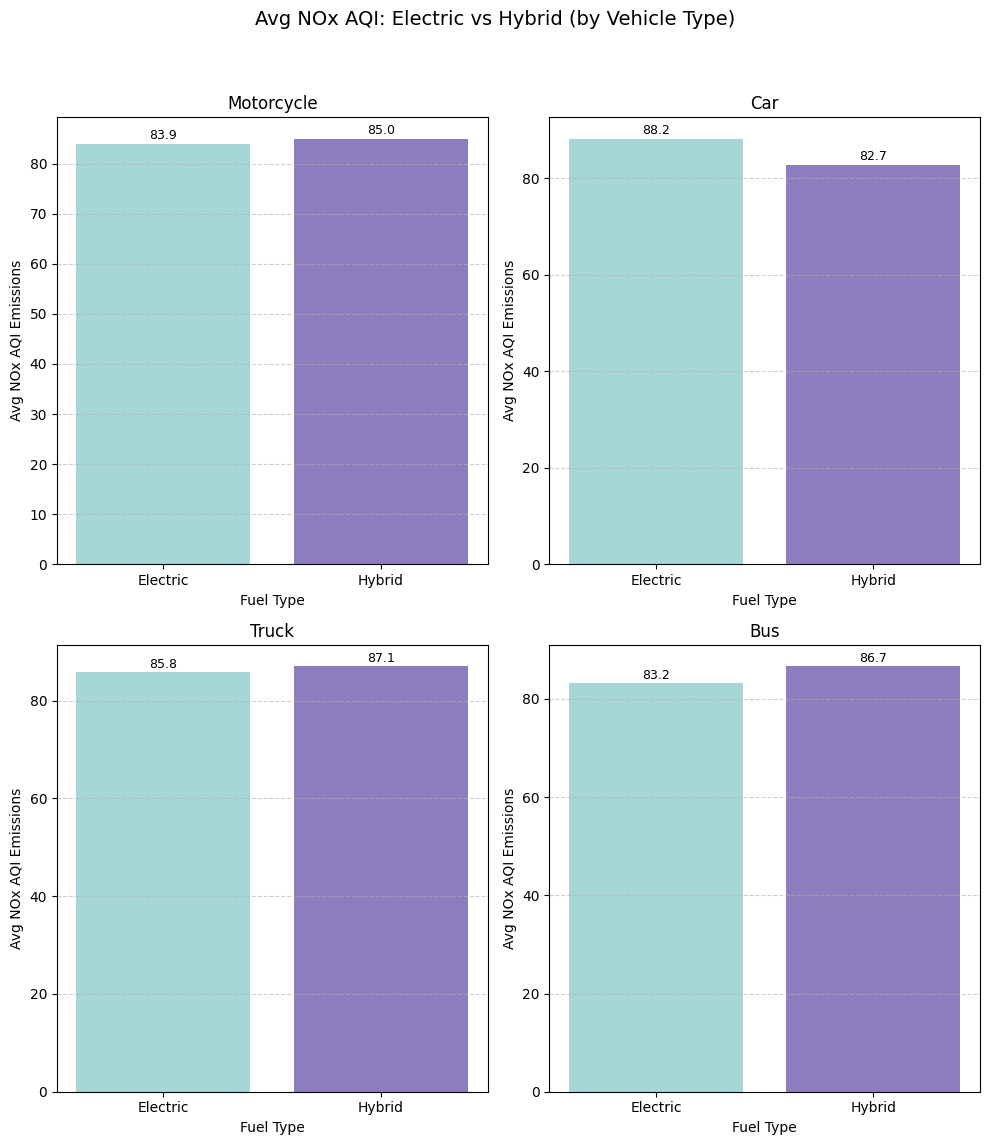


Average NOx AQI by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Electric    83.949337
Hybrid      85.002531
Name: NOx_AQI, dtype: float64

Car:
Fuel Type
Electric    88.159813
Hybrid      82.722033
Name: NOx_AQI, dtype: float64

Truck:
Fuel Type
Electric    85.831253
Hybrid      87.055661
Name: NOx_AQI, dtype: float64

Bus:
Fuel Type
Electric    83.190508
Hybrid      86.665508
Name: NOx_AQI, dtype: float64

Conclusion:
- For Motorcycle: EVs have lower NOx AQI (83.95) compared to Hybrid (85.00).
- For Car: EVs have higher NOx AQI (88.16) compared to Hybrid (82.72).
- For Truck: EVs have lower NOx AQI (85.83) compared to Hybrid (87.06).
- For Bus: EVs have lower NOx AQI (83.19) compared to Hybrid (86.67).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Hybrid']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
nox_aqi_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    nox_aqi_means = df_vehicle.groupby('Fuel Type')['NOx_AQI'].mean()
    nox_aqi_results[vehicle] = nox_aqi_means

    ax = axs[i]
    bars = ax.bar(nox_aqi_means.index, nox_aqi_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg NOx AQI Emissions')
    ax.set_xticks(range(len(nox_aqi_means.index)))
    ax.set_xticklabels(nox_aqi_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg NOx AQI: Electric vs Hybrid (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage NOx AQI by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(nox_aqi_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_nox_aqi = nox_aqi_results[vehicle].get('Electric', float('nan'))
    hybrid_nox_aqi = nox_aqi_results[vehicle].get('Hybrid', float('nan'))
    
    if not pd.isna(ev_nox_aqi) and not pd.isna(hybrid_nox_aqi):
        print(f"- For {vehicle}: EVs have {'lower' if ev_nox_aqi < hybrid_nox_aqi else 'higher'} NOx AQI ({ev_nox_aqi:.2f}) compared to Hybrid ({hybrid_nox_aqi:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Hybrid data missing).")


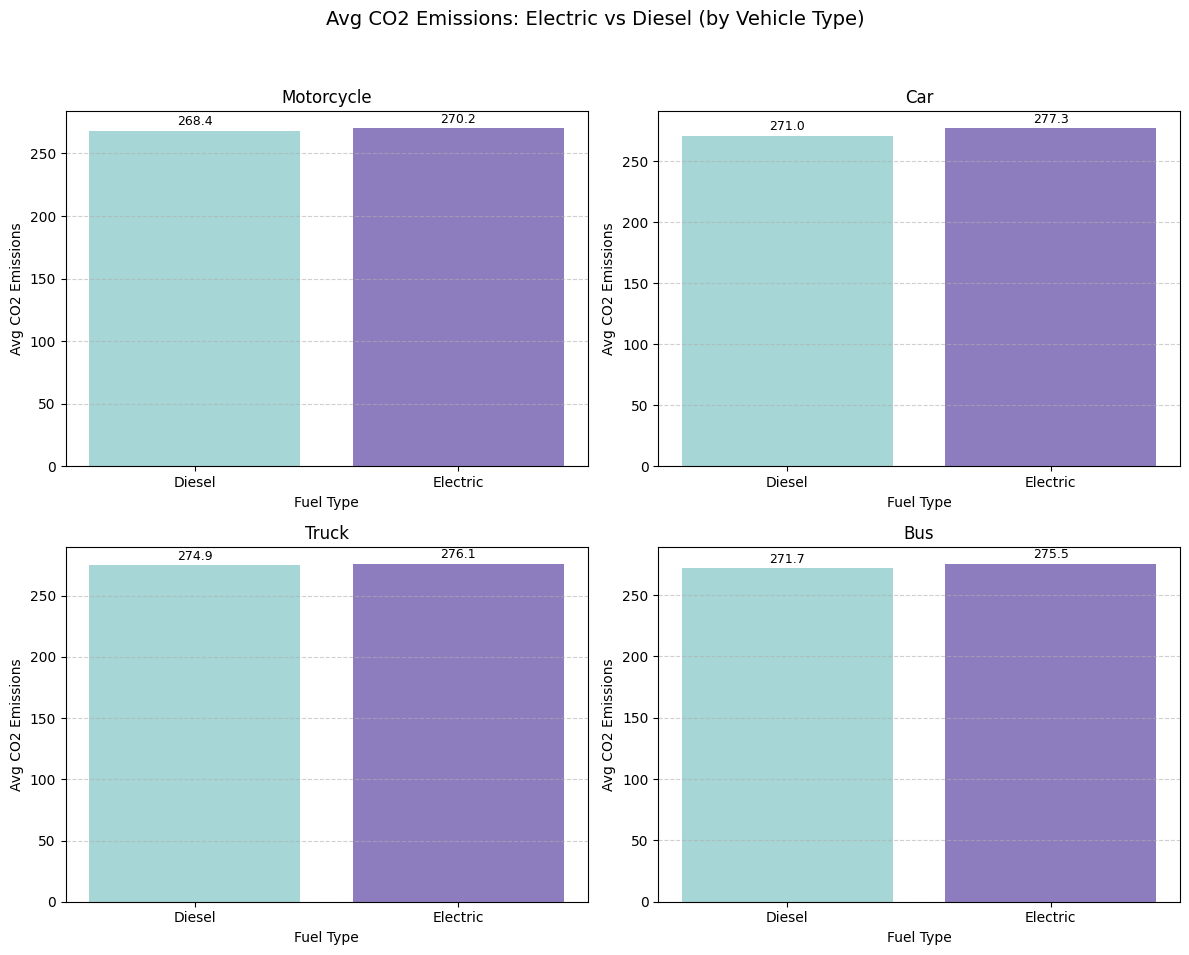


Average CO2 Emissions by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Diesel      268.357436
Electric    270.186002
Name: CO2 Emissions, dtype: float64

Car:
Fuel Type
Diesel      271.020433
Electric    277.256000
Name: CO2 Emissions, dtype: float64

Truck:
Fuel Type
Diesel      274.912761
Electric    276.143893
Name: CO2 Emissions, dtype: float64

Bus:
Fuel Type
Diesel      271.675925
Electric    275.513924
Name: CO2 Emissions, dtype: float64

Conclusion:
- For Motorcycle: EVs have higher CO2 Emissions (270.19) compared to Diesel (268.36).
- For Car: EVs have higher CO2 Emissions (277.26) compared to Diesel (271.02).
- For Truck: EVs have higher CO2 Emissions (276.14) compared to Diesel (274.91).
- For Bus: EVs have higher CO2 Emissions (275.51) compared to Diesel (271.68).


In [15]:
#CO2 Emissions

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Diesel']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
co2_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    co2_means = df_vehicle.groupby('Fuel Type')['CO2 Emissions'].mean()
    co2_results[vehicle] = co2_means

    ax = axs[i]
    bars = ax.bar(co2_means.index, co2_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg CO2 Emissions')
    ax.set_xticks(range(len(co2_means.index)))
    ax.set_xticklabels(co2_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg CO2 Emissions: Electric vs Diesel (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage CO2 Emissions by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(co2_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_co2 = co2_results[vehicle].get('Electric', float('nan'))
    diesel_co2 = co2_results[vehicle].get('Diesel', float('nan'))
    
    if not pd.isna(ev_co2) and not pd.isna(diesel_co2):
        print(f"- For {vehicle}: EVs have {'lower' if ev_co2 < diesel_co2 else 'higher'} CO2 Emissions ({ev_co2:.2f}) compared to Diesel ({diesel_co2:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Diesel data missing).")


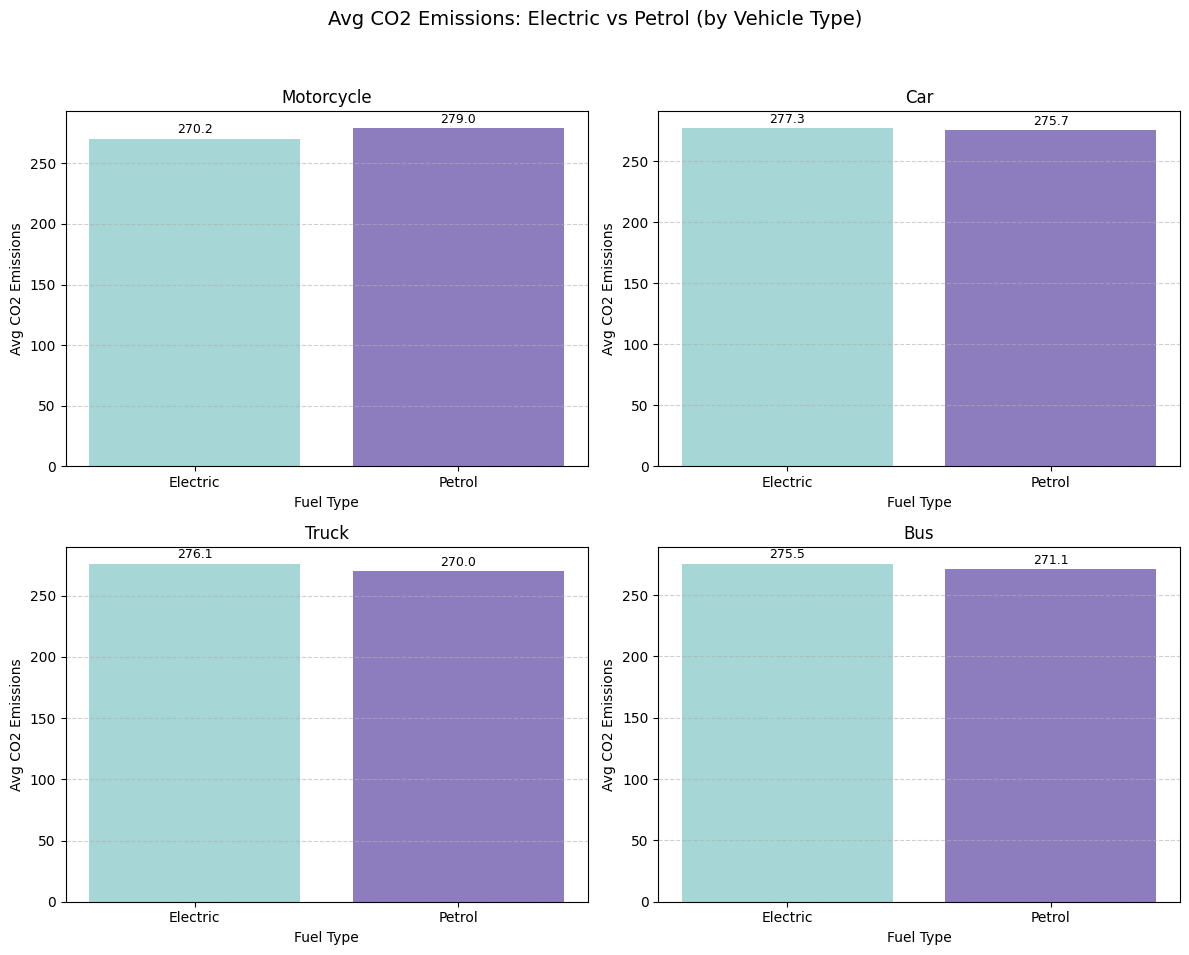


Average CO2 Emissions by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Electric    270.186002
Petrol      278.997806
Name: CO2 Emissions, dtype: float64

Car:
Fuel Type
Electric    277.256000
Petrol      275.732802
Name: CO2 Emissions, dtype: float64

Truck:
Fuel Type
Electric    276.143893
Petrol      269.982181
Name: CO2 Emissions, dtype: float64

Bus:
Fuel Type
Electric    275.513924
Petrol      271.057075
Name: CO2 Emissions, dtype: float64

Conclusion:
- For Motorcycle: EVs have lower CO2 Emissions (270.19) compared to Diesel (279.00).
- For Car: EVs have higher CO2 Emissions (277.26) compared to Diesel (275.73).
- For Truck: EVs have higher CO2 Emissions (276.14) compared to Diesel (269.98).
- For Bus: EVs have higher CO2 Emissions (275.51) compared to Diesel (271.06).


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Petrol']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
co2_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    co2_means = df_vehicle.groupby('Fuel Type')['CO2 Emissions'].mean()
    co2_results[vehicle] = co2_means

    ax = axs[i]
    bars = ax.bar(co2_means.index, co2_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg CO2 Emissions')
    ax.set_xticks(range(len(co2_means.index)))
    ax.set_xticklabels(co2_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg CO2 Emissions: Electric vs Petrol (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage CO2 Emissions by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(co2_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_co2 = co2_results[vehicle].get('Electric', float('nan'))
    petrol_co2 = co2_results[vehicle].get('Petrol', float('nan'))
    
    if not pd.isna(ev_co2) and not pd.isna(petrol_co2):
        print(f"- For {vehicle}: EVs have {'lower' if ev_co2 < petrol_co2 else 'higher'} CO2 Emissions ({ev_co2:.2f}) compared to Diesel ({petrol_co2:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Petrol data missing).")


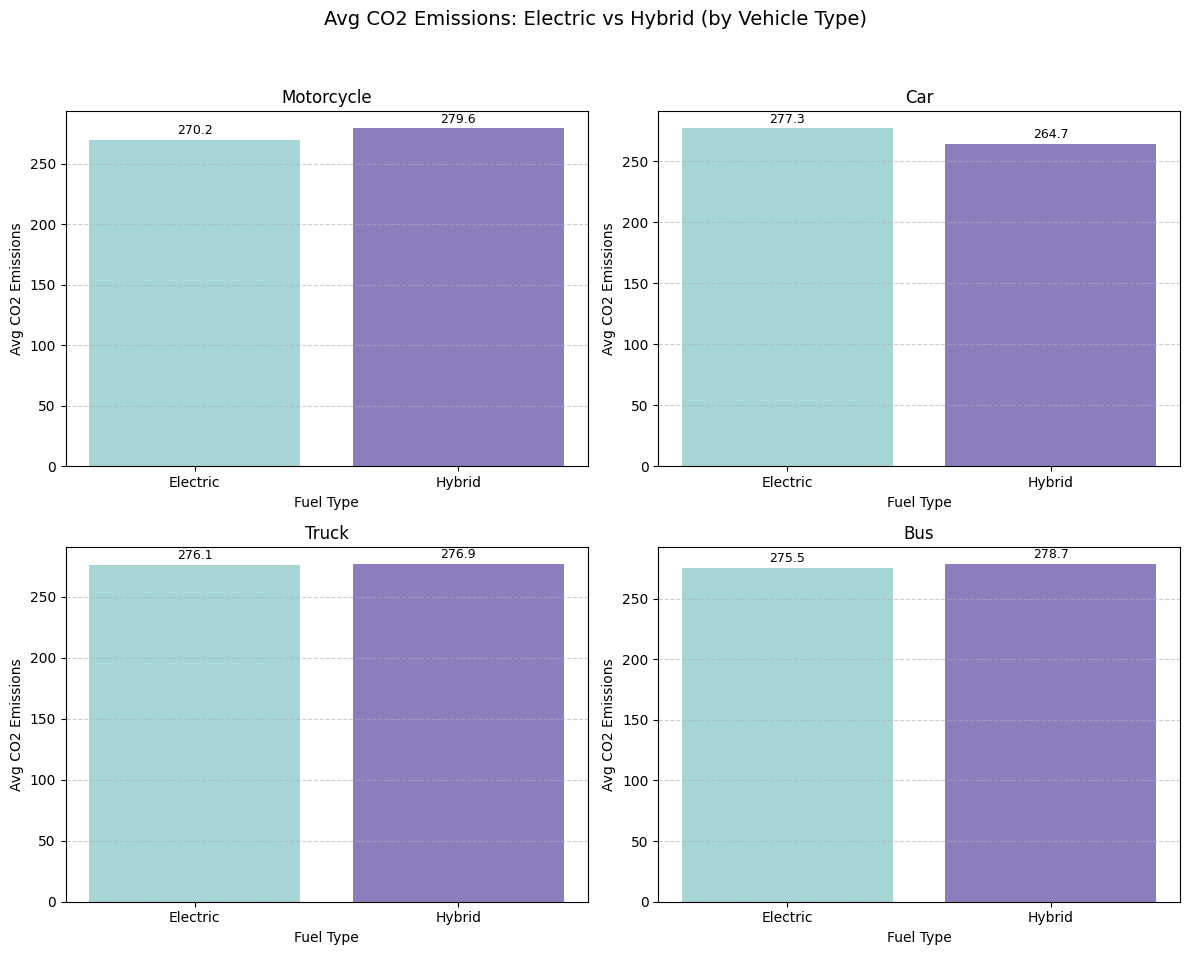


Average CO2 Emissions by Vehicle Type and Fuel Type:

Motorcycle:
Fuel Type
Electric    270.186002
Hybrid      279.554505
Name: CO2 Emissions, dtype: float64

Car:
Fuel Type
Electric    277.2560
Hybrid      264.6575
Name: CO2 Emissions, dtype: float64

Truck:
Fuel Type
Electric    276.143893
Hybrid      276.878847
Name: CO2 Emissions, dtype: float64

Bus:
Fuel Type
Electric    275.513924
Hybrid      278.733818
Name: CO2 Emissions, dtype: float64

Conclusion:
- For Motorcycle: EVs have lower CO2 Emissions (270.19) compared to Hybrid (279.55).
- For Car: EVs have higher CO2 Emissions (277.26) compared to Hybrid (264.66).
- For Truck: EVs have lower CO2 Emissions (276.14) compared to Hybrid (276.88).
- For Bus: EVs have lower CO2 Emissions (275.51) compared to Hybrid (278.73).


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

fuel_types = ['Electric', 'Hybrid']
df_filtered = df[df['Fuel Type'].isin(fuel_types)]

vehicle_types = ['Motorcycle', 'Car', 'Truck', 'Bus']
co2_results = {}

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, vehicle in enumerate(vehicle_types):
    df_vehicle = df_filtered[df_filtered['Vehicle Type'] == vehicle]
    co2_means = df_vehicle.groupby('Fuel Type')['CO2 Emissions'].mean()
    co2_results[vehicle] = co2_means

    ax = axs[i]
    bars = ax.bar(co2_means.index, co2_means.values, color=['#A6D6D6', '#8E7DBE'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=9)

    ax.set_title(vehicle, fontsize=12)
    ax.set_xlabel('Fuel Type')
    ax.set_ylabel('Avg CO2 Emissions')
    ax.set_xticks(range(len(co2_means.index)))
    ax.set_xticklabels(co2_means.index)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Avg CO2 Emissions: Electric vs Hybrid (by Vehicle Type)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 

# Print results
print("\nAverage CO2 Emissions by Vehicle Type and Fuel Type:")
for vehicle in vehicle_types:
    print(f"\n{vehicle}:")
    print(co2_results[vehicle])

# Conclusion
print("\nConclusion:")
for vehicle in vehicle_types:
    ev_co2 = co2_results[vehicle].get('Electric', float('nan'))
    hybrid_co2 = co2_results[vehicle].get('Hybrid', float('nan'))
    
    if not pd.isna(ev_co2) and not pd.isna(hybrid_co2):
        print(f"- For {vehicle}: EVs have {'lower' if ev_co2 < hybrid_co2 else 'higher'} CO2 Emissions ({ev_co2:.2f}) compared to Hybrid ({hybrid_co2:.2f}).")
    else:
        print(f"- For {vehicle}: Insufficient data for comparison (EV or Hybrid data missing).")


C:\Users\SKB PC\AppData\Local\Temp\ipykernel_31388\2721413147.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

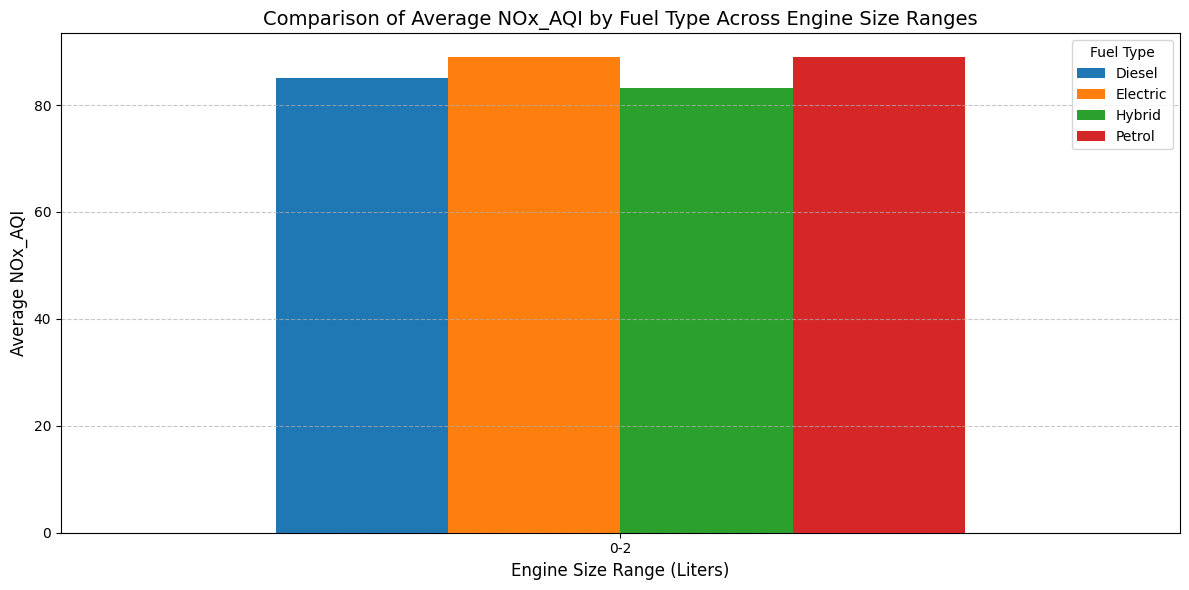


Average NOx_AQI by Engine Size Range and Fuel Type:
Fuel Type             Diesel   Electric     Hybrid     Petrol
Engine_Size_Range                                            
0-2                85.098372  88.962119  83.273634  88.892742

Conclusion:
Based on the grouped bar plot and average NOx_AQI values:

For Engine Size Range 0-2:
- EV vs Diesel: EVs have higher NOx_AQI (88.96) compared to Diesel (85.10).
- EV vs Petrol: EVs have higher NOx_AQI (88.96) compared to Petrol (88.89).
- EV vs Hybrid: EVs have higher NOx_AQI (88.96) compared to Hybrid (83.27).


In [21]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Filter rows where Engine Size is within the range 0 to 8
df_filtered = df[df['Engine Size'].between(0, 8)]

# Define bins and labels for Engine Size categorization
bins = [0, 2]
labels = ['0-2']
df_filtered['Engine_Size_Range'] = pd.cut(df_filtered['Engine Size'], bins=bins, labels=labels, include_lowest=True)

# Filter for relevant fuel types (Electric, Diesel, Petrol, Hybrid)
fuel_types = ['Diesel', 'Electric', 'Hybrid', 'Petrol']
df_filtered = df_filtered[df_filtered['Fuel Type'].isin(fuel_types)]

# Group by Engine_Size_Range and Fuel Type, and calculate mean NOx_AQI
nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
nox_aqi_means.plot(kind='bar', width=0.8, figsize=(12, 6))
plt.title('Comparison of Average NOx_AQI by Fuel Type Across Engine Size Ranges', fontsize=14)
plt.xlabel('Engine Size Range (Liters)', fontsize=12)
plt.ylabel('Average NOx_AQI', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the mean NOx_AQI values for reference
print("\nAverage NOx_AQI by Engine Size Range and Fuel Type:")
print(nox_aqi_means)

# Conclusion
print("\nConclusion:")
print("Based on the grouped bar plot and average NOx_AQI values:")
for engine_range in nox_aqi_means.index:
    print(f"\nFor Engine Size Range {engine_range}:")
    ev_nox = nox_aqi_means.loc[engine_range, 'Electric'] if 'Electric' in nox_aqi_means.columns else float('nan')
    diesel_nox = nox_aqi_means.loc[engine_range, 'Diesel'] if 'Diesel' in nox_aqi_means.columns else float('nan')
    petrol_nox = nox_aqi_means.loc[engine_range, 'Petrol'] if 'Petrol' in nox_aqi_means.columns else float('nan')
    hybrid_nox = nox_aqi_means.loc[engine_range, 'Hybrid'] if 'Hybrid' in nox_aqi_means.columns else float('nan')
    
    if not pd.isna(ev_nox) and not pd.isna(diesel_nox):
        print(f"- EV vs Diesel: EVs have {'lower' if ev_nox < diesel_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Diesel ({diesel_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(petrol_nox):
        print(f"- EV vs Petrol: EVs have {'lower' if ev_nox < petrol_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Petrol ({petrol_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(hybrid_nox):
        print(f"- EV vs Hybrid: EVs have {'lower' if ev_nox < hybrid_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Hybrid ({hybrid_nox:.2f}).")



C:\Users\SKB PC\AppData\Local\Temp\ipykernel_31388\2431509978.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

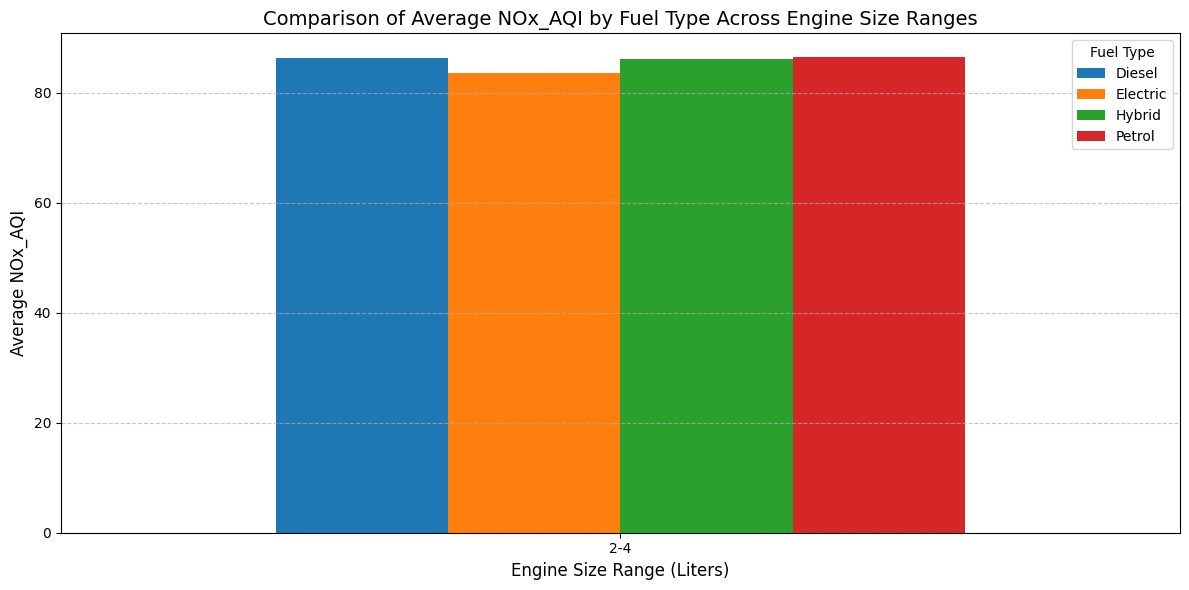


Average NOx_AQI by Engine Size Range and Fuel Type:
Fuel Type             Diesel   Electric     Hybrid     Petrol
Engine_Size_Range                                            
2-4                86.264479  83.699541  86.135524  86.500167

Conclusion:
Based on the grouped bar plot and average NOx_AQI values:

For Engine Size Range 2-4:
- EV vs Diesel: EVs have lower NOx_AQI (83.70) compared to Diesel (86.26).
- EV vs Petrol: EVs have lower NOx_AQI (83.70) compared to Petrol (86.50).
- EV vs Hybrid: EVs have lower NOx_AQI (83.70) compared to Hybrid (86.14).


In [23]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Filter rows where Engine Size is within the range 0 to 8
df_filtered = df[df['Engine Size'].between(0, 8)]

# Define bins and labels for Engine Size categorization
bins = [2, 4]
labels = ['2-4']
df_filtered['Engine_Size_Range'] = pd.cut(df_filtered['Engine Size'], bins=bins, labels=labels, include_lowest=True)

# Filter for relevant fuel types (Electric, Diesel, Petrol, Hybrid)
fuel_types = ['Diesel', 'Electric', 'Hybrid', 'Petrol']
df_filtered = df_filtered[df_filtered['Fuel Type'].isin(fuel_types)]

# Group by Engine_Size_Range and Fuel Type, and calculate mean NOx_AQI
nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
nox_aqi_means.plot(kind='bar', width=0.8, figsize=(12, 6))
plt.title('Comparison of Average NOx_AQI by Fuel Type Across Engine Size Ranges', fontsize=14)
plt.xlabel('Engine Size Range (Liters)', fontsize=12)
plt.ylabel('Average NOx_AQI', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the mean NOx_AQI values for reference
print("\nAverage NOx_AQI by Engine Size Range and Fuel Type:")
print(nox_aqi_means)

# Conclusion
print("\nConclusion:")
print("Based on the grouped bar plot and average NOx_AQI values:")
for engine_range in nox_aqi_means.index:
    print(f"\nFor Engine Size Range {engine_range}:")
    ev_nox = nox_aqi_means.loc[engine_range, 'Electric'] if 'Electric' in nox_aqi_means.columns else float('nan')
    diesel_nox = nox_aqi_means.loc[engine_range, 'Diesel'] if 'Diesel' in nox_aqi_means.columns else float('nan')
    petrol_nox = nox_aqi_means.loc[engine_range, 'Petrol'] if 'Petrol' in nox_aqi_means.columns else float('nan')
    hybrid_nox = nox_aqi_means.loc[engine_range, 'Hybrid'] if 'Hybrid' in nox_aqi_means.columns else float('nan')
    
    if not pd.isna(ev_nox) and not pd.isna(diesel_nox):
        print(f"- EV vs Diesel: EVs have {'lower' if ev_nox < diesel_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Diesel ({diesel_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(petrol_nox):
        print(f"- EV vs Petrol: EVs have {'lower' if ev_nox < petrol_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Petrol ({petrol_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(hybrid_nox):
        print(f"- EV vs Hybrid: EVs have {'lower' if ev_nox < hybrid_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Hybrid ({hybrid_nox:.2f}).")



C:\Users\SKB PC\AppData\Local\Temp\ipykernel_31388\2464147882.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

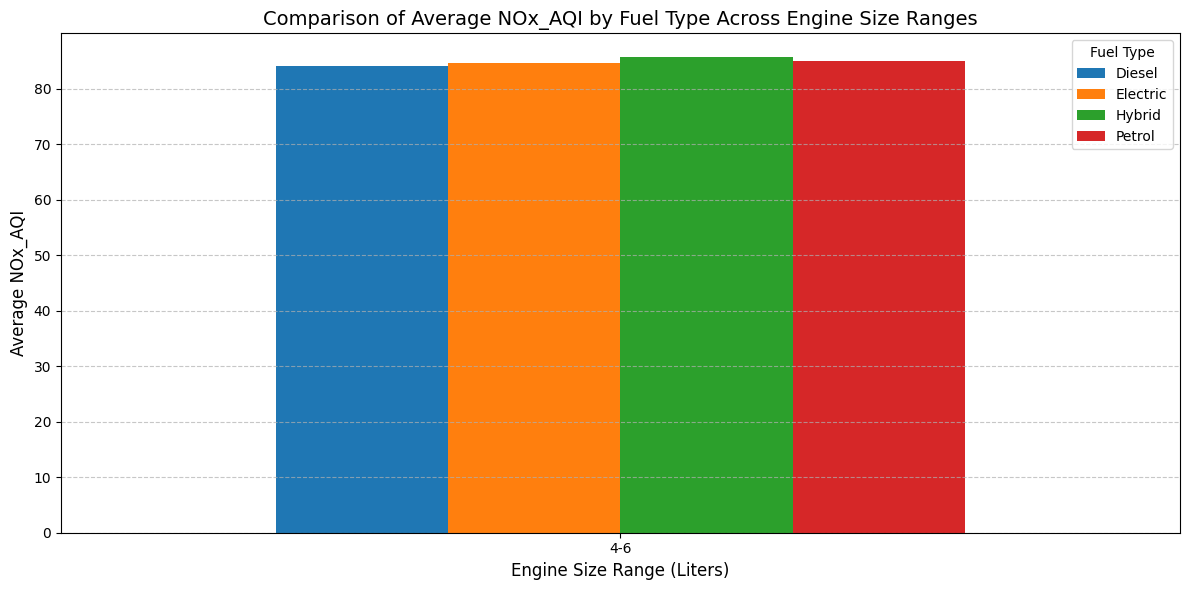


Average NOx_AQI by Engine Size Range and Fuel Type:
Fuel Type             Diesel   Electric     Hybrid     Petrol
Engine_Size_Range                                            
4-6                84.116254  84.650234  85.681804  84.900894

Conclusion:
Based on the grouped bar plot and average NOx_AQI values:

For Engine Size Range 4-6:
- EV vs Diesel: EVs have higher NOx_AQI (84.65) compared to Diesel (84.12).
- EV vs Petrol: EVs have lower NOx_AQI (84.65) compared to Petrol (84.90).
- EV vs Hybrid: EVs have lower NOx_AQI (84.65) compared to Hybrid (85.68).


In [25]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Filter rows where Engine Size is within the range 0 to 8
df_filtered = df[df['Engine Size'].between(0, 8)]

# Define bins and labels for Engine Size categorization
bins = [4, 6]
labels = ['4-6']
df_filtered['Engine_Size_Range'] = pd.cut(df_filtered['Engine Size'], bins=bins, labels=labels, include_lowest=True)

# Filter for relevant fuel types (Electric, Diesel, Petrol, Hybrid)
fuel_types = ['Diesel', 'Electric', 'Hybrid', 'Petrol']
df_filtered = df_filtered[df_filtered['Fuel Type'].isin(fuel_types)]

# Group by Engine_Size_Range and Fuel Type, and calculate mean NOx_AQI
nox_aqi_means = df_filtered.groupby(['Engine_Size_Range', 'Fuel Type'])['NOx_AQI'].mean().unstack()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
nox_aqi_means.plot(kind='bar', width=0.8, figsize=(12, 6))
plt.title('Comparison of Average NOx_AQI by Fuel Type Across Engine Size Ranges', fontsize=14)
plt.xlabel('Engine Size Range (Liters)', fontsize=12)
plt.ylabel('Average NOx_AQI', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the mean NOx_AQI values for reference
print("\nAverage NOx_AQI by Engine Size Range and Fuel Type:")
print(nox_aqi_means)

# Conclusion
print("\nConclusion:")
print("Based on the grouped bar plot and average NOx_AQI values:")
for engine_range in nox_aqi_means.index:
    print(f"\nFor Engine Size Range {engine_range}:")
    ev_nox = nox_aqi_means.loc[engine_range, 'Electric'] if 'Electric' in nox_aqi_means.columns else float('nan')
    diesel_nox = nox_aqi_means.loc[engine_range, 'Diesel'] if 'Diesel' in nox_aqi_means.columns else float('nan')
    petrol_nox = nox_aqi_means.loc[engine_range, 'Petrol'] if 'Petrol' in nox_aqi_means.columns else float('nan')
    hybrid_nox = nox_aqi_means.loc[engine_range, 'Hybrid'] if 'Hybrid' in nox_aqi_means.columns else float('nan')
    
    if not pd.isna(ev_nox) and not pd.isna(diesel_nox):
        print(f"- EV vs Diesel: EVs have {'lower' if ev_nox < diesel_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Diesel ({diesel_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(petrol_nox):
        print(f"- EV vs Petrol: EVs have {'lower' if ev_nox < petrol_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Petrol ({petrol_nox:.2f}).")
    if not pd.isna(ev_nox) and not pd.isna(hybrid_nox):
        print(f"- EV vs Hybrid: EVs have {'lower' if ev_nox < hybrid_nox else 'higher'} NOx_AQI ({ev_nox:.2f}) compared to Hybrid ({hybrid_nox:.2f}).")



In [2]:
#🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

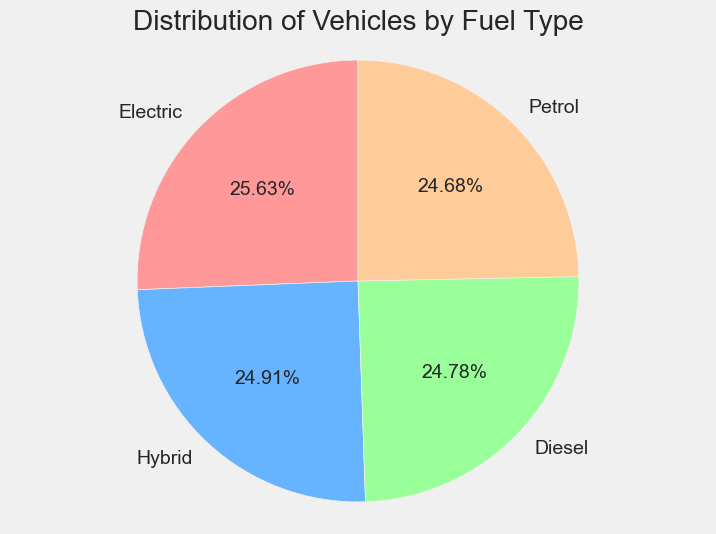

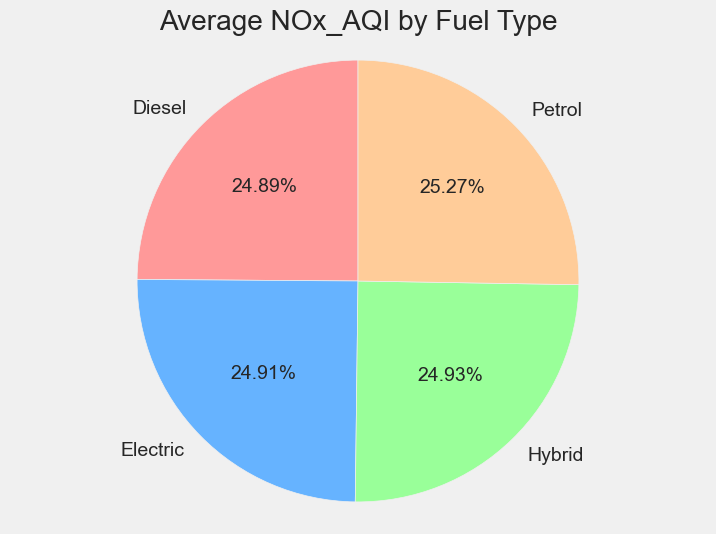

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Pie Chart 1: Number of vehicles by fuel type
# Count the number of vehicles for each fuel type
fuel_counts = data['Fuel Type'].value_counts()

# Create a pie chart for vehicle counts
plt.figure(figsize=(8, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.2f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Vehicles by Fuel Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Pie Chart 2: Average NOx_AQI by fuel type
# Calculate the average NOx_AQI for each fuel type
avg_nox_aqi = data.groupby('Fuel Type')['NOx_AQI'].mean()

# Create a pie chart for average NOx_AQI
plt.figure(figsize=(8, 6))
plt.pie(avg_nox_aqi, labels=avg_nox_aqi.index, autopct='%1.2f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Average NOx_AQI by Fuel Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

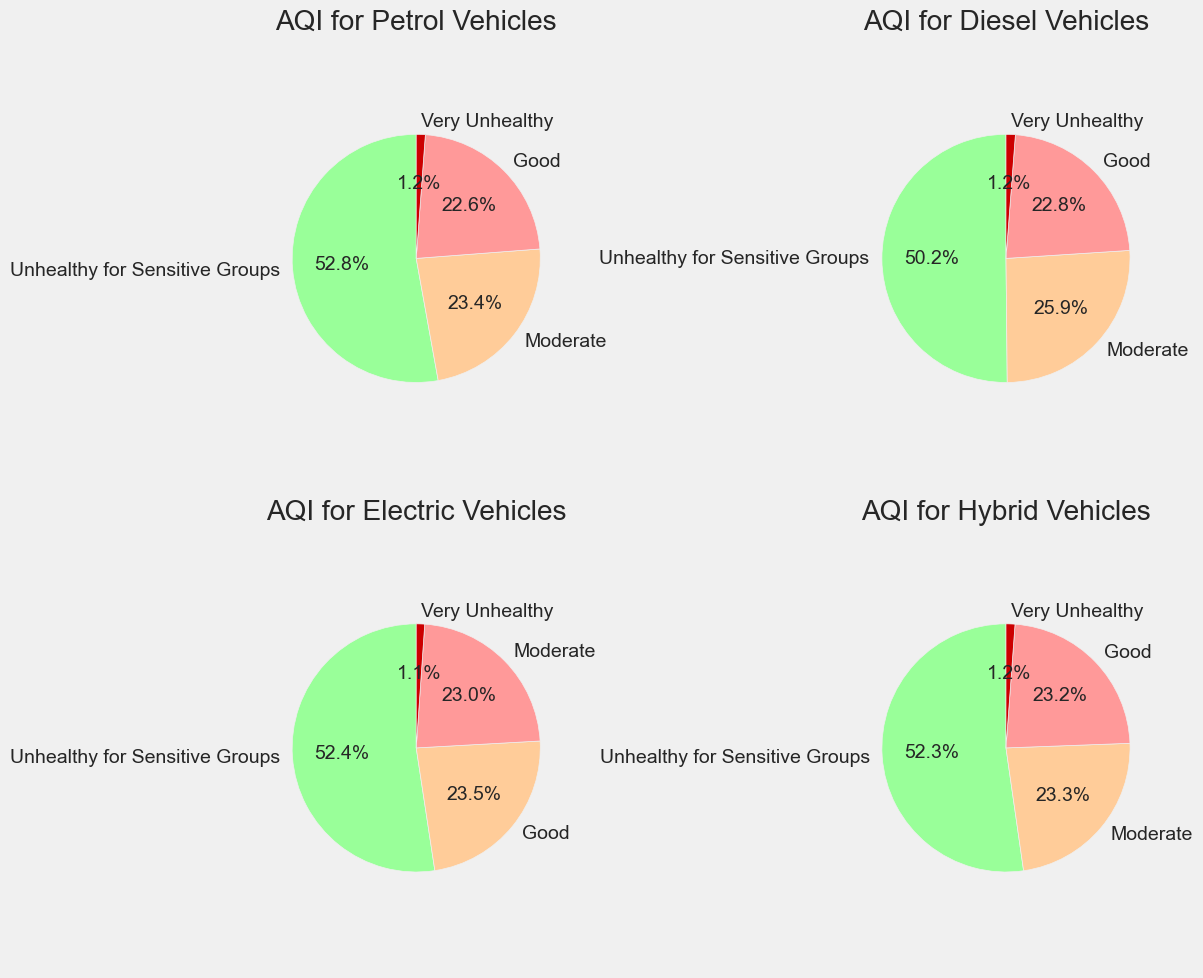

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Define fuel types and colors for AQI categories
fuel_types = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
colors = ['#99ff99', '#ffcc99', '#ff9999', '#cc0000']  # Colors for Good, Moderate, Unhealthy for Sensitive Groups, Very Unhealthy

# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2x2 array for easier iteration

# Iterate over each fuel type to create a pie chart
for i, fuel in enumerate(fuel_types):
    # Filter data for the current fuel type
    fuel_data = data[data['Fuel Type'] == fuel]
    # Count occurrences of each AQI_Category
    aqi_counts = fuel_data['AQI_Category'].value_counts()
    
    # Create pie chart
    axes[i].pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'AQI for {fuel} Vehicles')
    axes[i].axis('equal')  # Equal aspect ratio ensures circular pie charts

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [33]:
data.info

<bound method DataFrame.info of      Vehicle Type Fuel Type  Engine Size  Age of Vehicle  Temperature  \
0      Motorcycle  Electric     2.747609              22    13.880458   
1             Bus  Electric     5.743714               3    19.136947   
2             Bus    Hybrid     4.606368              17     8.123428   
3           Truck  Electric     3.913024               4    35.994893   
4           Truck    Hybrid     1.611297              15    14.793481   
...           ...       ...          ...             ...          ...   
9995   Motorcycle  Electric     5.259811               1     0.107381   
9996          Bus    Diesel     5.467046               5    37.641697   
9997          Bus    Petrol     5.722881               8    35.140403   
9998          Bus    Hybrid     2.866938               2    -6.692706   
9999          Car    Petrol     1.929130              15    16.066580   

       Humidity  Air Pressure  CO2 Emissions  NOx Emissions     NOx_AQI  \
0     52.883905 

In [37]:
data.shape


(10000, 11)

In [35]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Engine Size,Age of Vehicle,Temperature,Humidity,Air Pressure,CO2 Emissions,NOx Emissions,NOx_AQI
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,3.37,14.49,14.94,50.14,1000.20,273.75,1.04,85.55
std,1.50,8.58,14.43,28.79,28.79,130.79,0.55,41.15
min,0.80,0.00,-10.00,0.00,950.01,50.05,0.10,9.44
25%,2.08,7.00,2.33,25.73,975.10,158.45,0.57,54.79
50%,3.36,15.00,15.01,49.95,1000.79,274.73,1.05,102.13
75%,4.65,22.00,27.42,75.27,1025.09,387.96,1.51,110.93
max,6.00,29.00,40.00,99.99,1049.99,500.00,2.00,300.00


In [37]:
data.AQI_Category.value_counts()


AQI_Category
Unhealthy for Sensitive Groups    5192
Moderate                          2389
Good                              2303
Very Unhealthy                     116
Name: count, dtype: int64

In [39]:
data.AQI_Category.value_counts().hvplot.bar(
    title=" Target value : AQI", xlabel='AQI_Category', ylabel='Count', 
    width=700, height=350
)

:Bars   [AQI_Category]   (count)

In [41]:
# Checking for messing values
data.isna().sum()

Vehicle Type      0
Fuel Type         0
Engine Size       0
Age of Vehicle    0
Temperature       0
Humidity          0
Air Pressure      0
CO2 Emissions     0
NOx Emissions     0
NOx_AQI           0
AQI_Category      0
dtype: int64

In [43]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)

['Vehicle Type', 'Fuel Type', 'AQI_Category']


In [45]:
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')
df.head()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Temperature,Humidity,Air Pressure,CO2 Emissions,NOx Emissions,NOx_AQI,AQI_Category
0,Motorcycle,Electric,2.75,22,13.88,52.88,955.41,179.93,1.09,102.43,Unhealthy for Sensitive Groups
1,Bus,Electric,5.74,3,19.14,5.70,1035.76,250.51,1.29,106.21,Unhealthy for Sensitive Groups
2,Bus,Hybrid,4.61,17,8.12,3.95,976.21,404.98,0.26,24.36,Good
3,Truck,Electric,3.91,4,35.99,0.51,966.92,463.57,1.04,101.59,Unhealthy for Sensitive Groups
4,Truck,Hybrid,1.61,15,14.79,52.45,953.23,79.51,1.58,111.85,Unhealthy for Sensitive Groups


In [47]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Engine Size', 'Age of Vehicle', 'Temperature', 'Humidity', 'Air Pressure', 'CO2 Emissions', 'NOx Emissions','NOx_AQI']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])
df.head()


,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Temperature,Humidity,Air Pressure,CO2 Emissions,NOx Emissions,NOx_AQI,AQI_Category
0,Motorcycle,Electric,-0.42,0.87,-0.07,0.10,-1.56,-0.72,0.08,0.41,Unhealthy for Sensitive Groups
1,Bus,Electric,1.59,-1.34,0.29,-1.54,1.24,-0.18,0.44,0.50,Unhealthy for Sensitive Groups
2,Bus,Hybrid,0.83,0.29,-0.47,-1.60,-0.83,1.00,-1.43,-1.49,Good
3,Truck,Electric,0.36,-1.22,1.46,-1.72,-1.16,1.45,-0.00,0.39,Unhealthy for Sensitive Groups
4,Truck,Hybrid,-1.18,0.06,-0.01,0.08,-1.63,-1.49,0.98,0.64,Unhealthy for Sensitive Groups


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Load 
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')  

print("Original AQI_Category unique values:\n", df['AQI_Category'].unique())

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the AQI_Category column
df['AQI_Category'] = le.fit_transform(df['AQI_Category'])

# Print the mapping of encoded labels to original categories
print("\nLabel encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i} => {label}")

# Verify the encoded AQI_Category values
print("\nEncoded AQI_Category unique values:\n", df['AQI_Category'].unique())

# Separate features and target
X = df.drop('AQI_Category', axis=1)
y = df['AQI_Category']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Print shapes and value counts
print("\nX_train shape:", X_train.shape)
print("\ny_train value counts:\n", y_train.value_counts())



# Optional: Map back encoded labels to original categories for verification
print("\nSample of y_train with original labels:")
print(le.inverse_transform(y_train.head()))


# Check data types and sample data
print("AQI_Category data type:", df['AQI_Category'].dtype)
print("Sample AQI_Category values:\n", df['AQI_Category'].head())
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)



Original AQI_Category unique values:
 ['Unhealthy for Sensitive Groups' 'Good' 'Moderate' 'Very Unhealthy']

Label encoding mapping:
0 => Good
1 => Moderate
2 => Unhealthy for Sensitive Groups
3 => Very Unhealthy

Encoded AQI_Category unique values:
 [2 0 1 3]

X_train shape: (7000, 16)

y_train value counts:
 AQI_Category
2    3622
1    1686
0    1603
3      89
Name: count, dtype: int64

Sample of y_train with original labels:
['Unhealthy for Sensitive Groups' 'Unhealthy for Sensitive Groups' 'Good'
 'Good' 'Unhealthy for Sensitive Groups']
AQI_Category data type: int64
Sample AQI_Category values:
 0    2
1    2
2    0
3    2
4    2
Name: AQI_Category, dtype: int64



Class Distribution in AQI_Category:
AQI_Category
Unhealthy for Sensitive Groups    0.5192
Moderate                          0.2389
Good                              0.2303
Very Unhealthy                    0.0116
Name: proportion, dtype: float64

Class Mapping (LabelEncoder):
0: Good
1: Moderate
2: Unhealthy for Sensitive Groups
3: Very Unhealthy

Encoded Data Shape: (10000, 14) (10000,)

Training Set Class Distribution:
2    0.519286
1    0.238857
0    0.230286
3    0.011571
Name: proportion, dtype: float64

===== Evaluating Random Forest =====
Train Accuracy: 100.00%
Test Accuracy: 49.47%
Overall Accuracy: 84.84%
Test Classification Report:
              precision    recall  f1-score      support
0              0.192661  0.030391  0.052500   691.000000
1              0.234848  0.043236  0.073027   717.000000
2              0.519029  0.919717  0.663577  1557.000000
3              0.000000  0.000000  0.000000    35.000000
accuracy       0.494667  0.494667  0.494667     0.494667
macro 

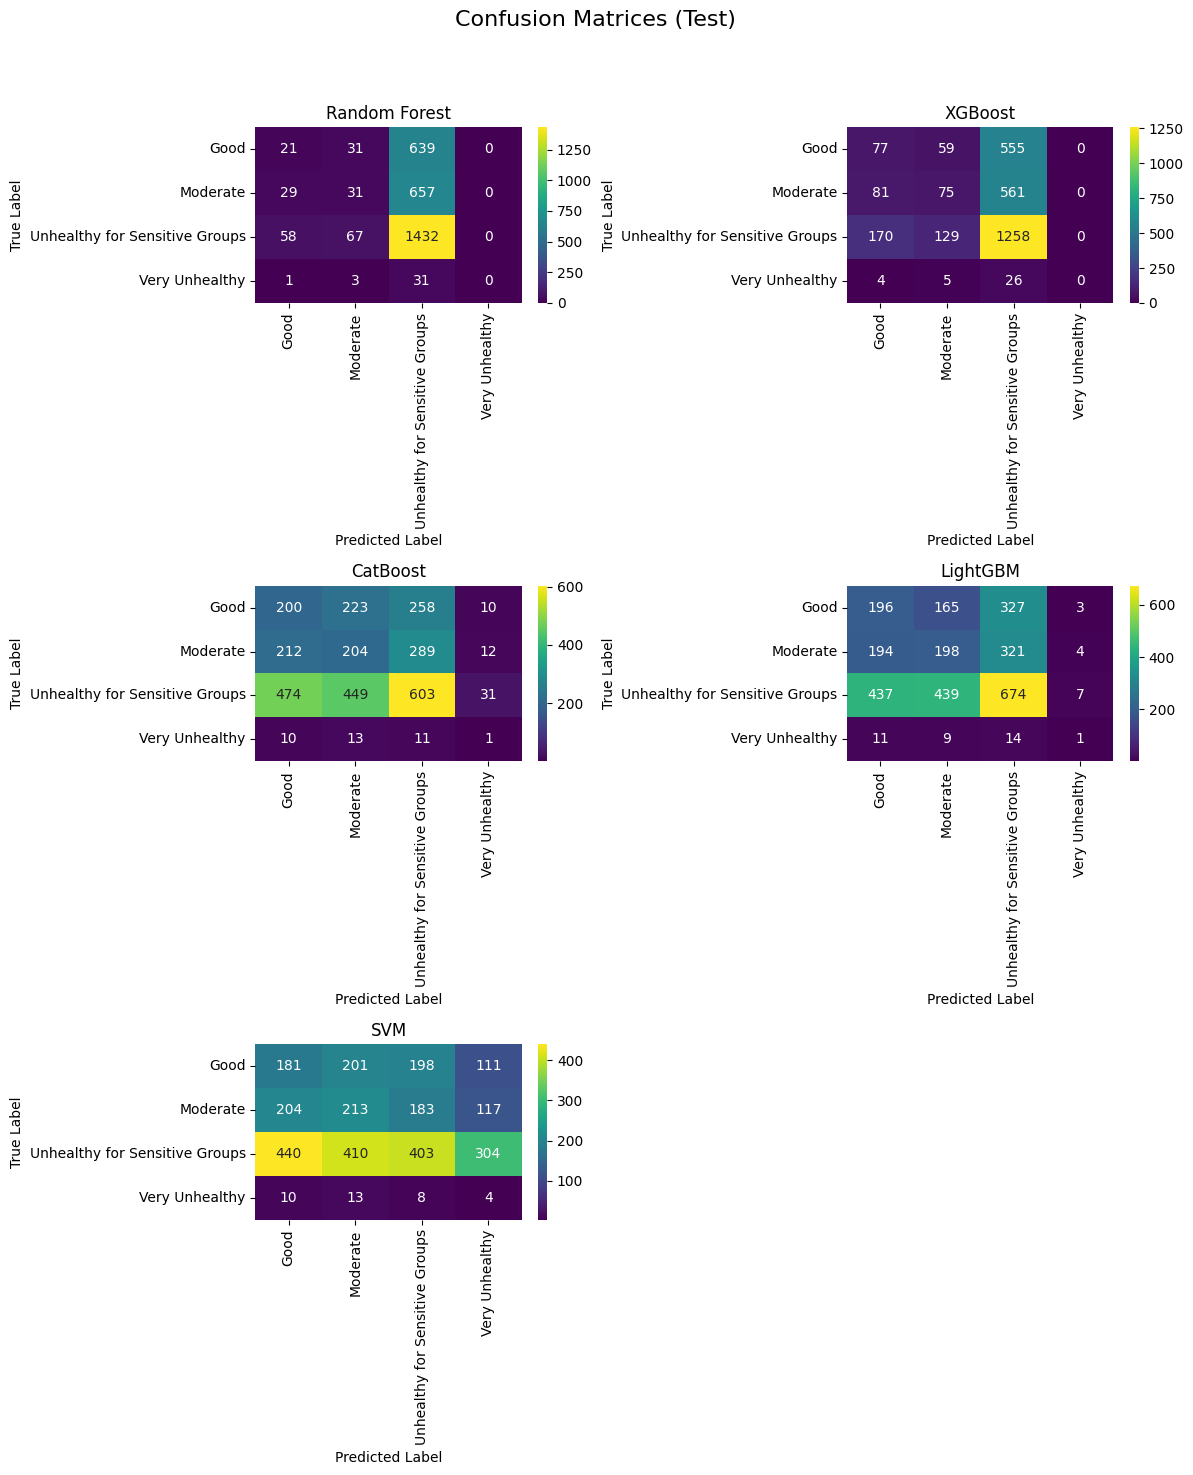


Model Comparison (Before Tuning):
           Model  Train Accuracy  Test Accuracy  Overall Accuracy  Macro F1  \
0  Random Forest        1.000000       0.494667            0.8484  0.197276   
1        XGBoost        0.904429       0.470000            0.7741  0.234664   
3       LightGBM        0.843286       0.356333            0.6972  0.255373   
2       CatBoost        0.665857       0.336000            0.5669  0.243069   
4            SVM        0.369286       0.267000            0.3386  0.217122   

   Very Unhealthy F1  
0           0.000000  
1           0.000000  
3           0.040000  
2           0.022472  
4           0.014011  

Results saved to 'before_tuning_results.csv'


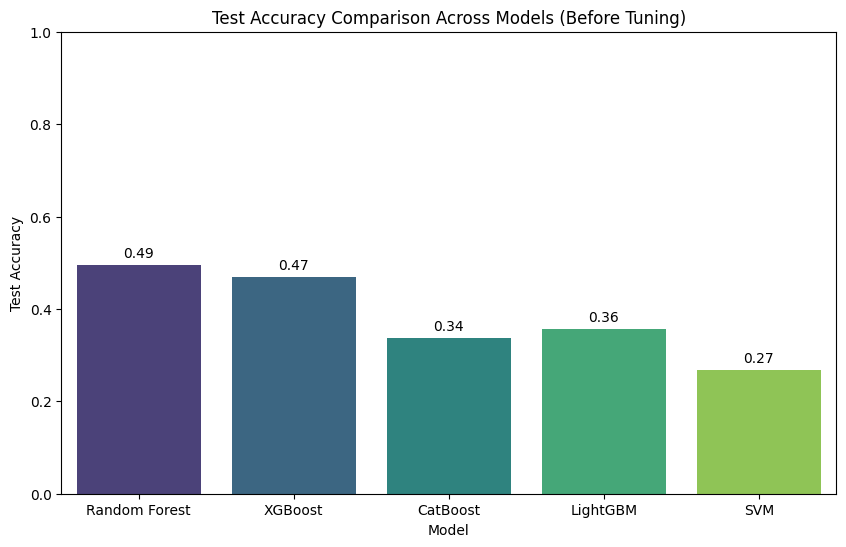

In [14]:
#BEFORE TUNING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

# Check class distribution
print("\nClass Distribution in AQI_Category:")
print(df['AQI_Category'].value_counts(normalize=True))

# Define features and target
features = ['Vehicle Type', 'Fuel Type', 'Engine Size', 'Age of Vehicle', 'Temperature', 'Humidity', 'Air Pressure']
X = df[features]
y = df['AQI_Category']

# Feature engineering: Add interaction term
X['Engine_Size_Age'] = X['Engine Size'] * X['Age of Vehicle']

# Update features list
features.append('Engine_Size_Age')

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Engine Size', 'Age of Vehicle', 'Temperature', 'Humidity', 'Air Pressure', 'Engine_Size_Age']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Encode categorical features and replace spaces with underscores
X_encoded = pd.get_dummies(X, columns=['Vehicle Type', 'Fuel Type'], drop_first=False)
X_encoded.columns = [col.replace(' ', '_') for col in X_encoded.columns]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print class mapping
print("\nClass Mapping (LabelEncoder):")
for idx, class_name in enumerate(le.classes_):
    print(f"{idx}: {class_name}")

# Check encoded data shape
print("\nEncoded Data Shape:", X_encoded.shape, y_encoded.shape)

# Split the data (stratify to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Print training set class distribution
print("\nTraining Set Class Distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

# Scale features for all models
scaler_all = StandardScaler()
X_train_scaled = scaler_all.fit_transform(X_train)
X_test_scaled = scaler_all.transform(X_test)
X_encoded_scaled = scaler_all.transform(X_encoded)

# Define models with class weights
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=4, n_estimators=100, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(iterations=100, random_seed=42, verbose=0, thread_count=-1, auto_class_weights='Balanced'),
    'LightGBM': LGBMClassifier(objective='multiclass', num_class=4, n_estimators=100, 
                               class_weight='balanced', random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True, 
               decision_function_shape='ovo', class_weight='balanced')
}

# Train and evaluate each model
results = []
# Adjust subplot layout: 3 rows, 2 columns for 5 models
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3x2 grid
axes = axes.flatten()
fig.suptitle('Confusion Matrices (Test)', fontsize=16)

for idx, (name, model) in enumerate(models.items()):
    print(f"\n===== Evaluating {name} =====")
    # Use scaled data for all models
    X_train_fit = X_train_scaled
    X_test_fit = X_test_scaled
    X_all_fit = X_encoded_scaled
    
    # Train model
    model.fit(X_train_fit, y_train)
    
    # Train accuracy
    y_pred_train = model.predict(X_train_fit)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
    
    # Test accuracy
    y_pred_test = model.predict(X_test_fit)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Overall accuracy
    y_pred_all = model.predict(X_all_fit)
    overall_accuracy = accuracy_score(y_encoded, y_pred_all)
    print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
    
    # Classification report for test set
    clf_report = classification_report(y_test, y_pred_test, output_dict=True)
    print("Test Classification Report:")
    print(pd.DataFrame(clf_report).transpose())
    
    # Confusion matrix for test set
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
                xticklabels=le.classes_, yticklabels=le.classes_, 
                ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')
    
    # Store results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Overall Accuracy': overall_accuracy,
        'Macro F1': clf_report['macro avg']['f1-score'],
        'Very Unhealthy F1': clf_report.get(str(le.transform(['Very Unhealthy'])[0]), {}).get('f1-score', 0)
    })

# Remove empty subplot (if any)
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display comparison
results_df = pd.DataFrame(results)
print("\nModel Comparison (Before Tuning):")
print(results_df.sort_values(by='Test Accuracy', ascending=False)[['Model', 'Train Accuracy', 'Test Accuracy', 'Overall Accuracy', 'Macro F1', 'Very Unhealthy F1']])

# Save results to CSV
results_df.to_csv('before_tuning_results.csv')
print("\nResults saved to 'before_tuning_results.csv'")

# Plot bar graph for test accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title('Test Accuracy Comparison Across Models (Before Tuning)')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
for i, v in enumerate(results_df['Test Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()


===== Tuning Random Forest =====
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Train Accuracy: 89.11%
Tuned Test Accuracy: 41.50%
Tuned Overall Accuracy: 74.83%
Tuned Test Classification Report:
              precision    recall  f1-score   support
0              0.239209  0.192475  0.213312   691.000
1              0.247974  0.213389  0.229385   717.000
2              0.526056  0.615928  0.567456  1557.000
3              0.000000  0.000000  0.000000    35.000
accuracy       0.415000  0.415000  0.415000     0.415
macro avg      0.253310  0.255448  0.252538  3000.000
weighted avg   0.387387  0.415000  0.398465  3000.000

===== Tuning XGBoost =====
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for XGBoost: {'learning_rate': 0.3, 'n_estimators': 200}
Tuned Train Accuracy: 99.21%
Tuned Test Accuracy: 45.13%
Tuned Overall Accuracy: 82.99%
Tuned

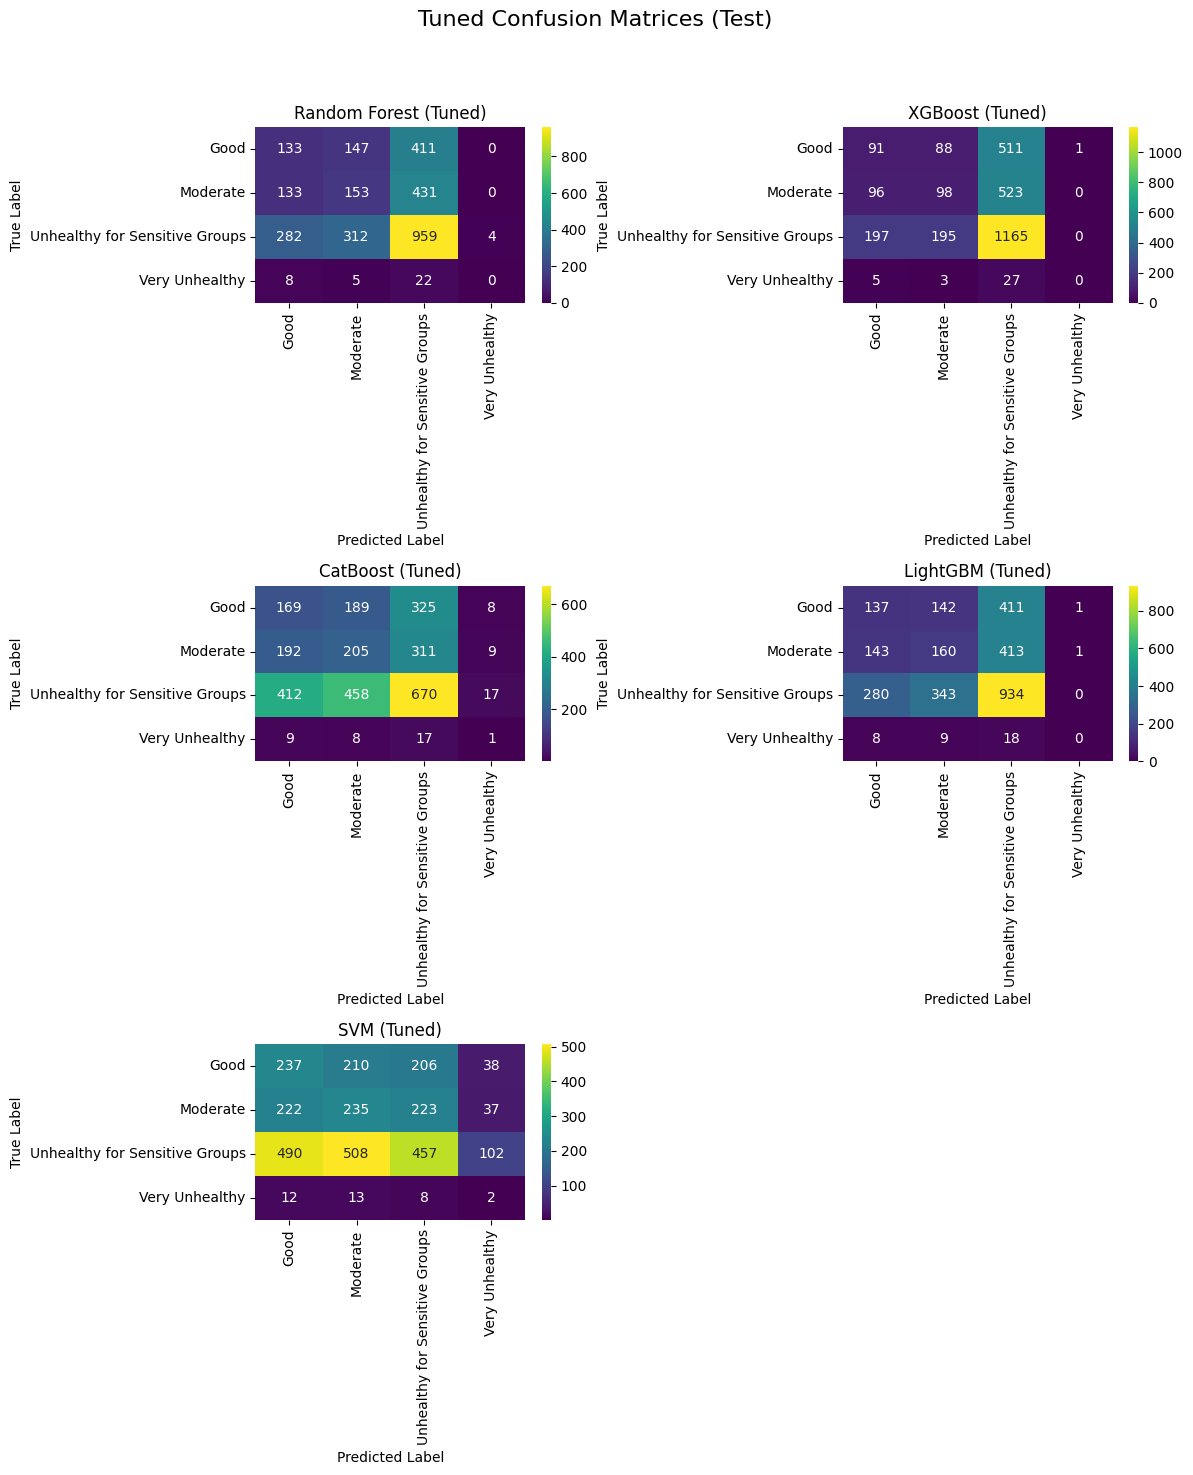


Model Comparison (After Tuning):
           Model  Train Accuracy  Test Accuracy  Overall Accuracy  Macro F1  \
1        XGBoost        0.992143       0.451333            0.8299  0.240613   
0  Random Forest        0.891143       0.415000            0.7483  0.252538   
3       LightGBM        0.998857       0.410333            0.8223  0.252874   
2       CatBoost        0.786286       0.348333            0.6549  0.245825   
4            SVM        0.484286       0.310333            0.4321  0.239447   

   Very Unhealthy F1  
1           0.000000  
0           0.000000  
3           0.000000  
2           0.028571  
4           0.018692  

Results saved to 'after_tuning_results.csv'


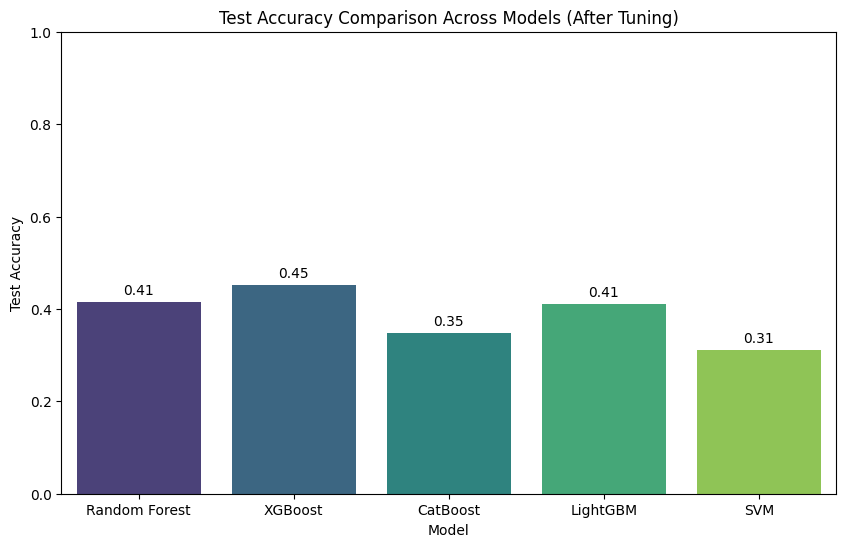


Accuracy Comparison (Before vs After Tuning):
              Train Accuracy               Test Accuracy                \
Stage           After Tuning Before Tuning  After Tuning Before Tuning   
Model                                                                    
CatBoost            0.786286      0.665857      0.348333      0.336000   
LightGBM            0.998857      0.843286      0.410333      0.356333   
Random Forest       0.891143      1.000000      0.415000      0.494667   
SVM                 0.484286      0.369286      0.310333      0.267000   
XGBoost             0.992143      0.904429      0.451333      0.470000   

              Overall Accuracy                
Stage             After Tuning Before Tuning  
Model                                         
CatBoost                0.6549        0.5669  
LightGBM                0.8223        0.6972  
Random Forest           0.7483        0.8484  
SVM                     0.4321        0.3386  
XGBoost                 0.8299 

In [16]:
#after tuning
import warnings
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Suppress all LightGBM warnings
warnings.filterwarnings('ignore', category=Warning, module='lightgbm')

# Re-define LightGBM model with verbose=-1 to suppress warnings
models['LightGBM'] = LGBMClassifier(
    objective='multiclass', 
    num_class=4, 
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42, 
    n_jobs=-1, 
    verbose=-1  # Suppress LightGBM training logs
)

# Define hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.3]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'num_leaves': [31, 50, 100]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.1],
        'kernel': ['rbf']
    }
}

# Store tuned models and results
tuned_results = []

# Setup subplot for confusion matrices: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()
fig.suptitle('Tuned Confusion Matrices (Test)', fontsize=16)

# Assuming baseline variables are available (from previous code)
# These should be defined or passed from the baseline code
# For completeness, I'll assume they are available as global variables
# X_train_scaled, X_test_scaled, X_encoded_scaled, y_train, y_test, y_encoded, le, df, X_test

# Tune each model
for idx, (name, model) in enumerate(models.items()):
    print(f"\n===== Tuning {name} =====")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    # Use scaled data from baseline
    X_train_fit = X_train_scaled
    X_test_fit = X_test_scaled
    grid_search.fit(X_train_fit, y_train)
    
    # Best parameters
    print(f"Best Parameters for {name}:", grid_search.best_params_)
    
    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    
    # Train accuracy
    y_pred_train = tuned_model.predict(X_train_fit)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Tuned Train Accuracy: {train_accuracy * 100:.2f}%")
    
    # Test accuracy
    y_pred_test = tuned_model.predict(X_test_fit)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Tuned Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Overall accuracy
    X_all = X_encoded_scaled
    y_pred_all = tuned_model.predict(X_all)
    overall_accuracy = accuracy_score(y_encoded, y_pred_all)
    print(f"Tuned Overall Accuracy: {overall_accuracy * 100:.2f}%")
    
    # Classification report
    clf_report = classification_report(y_test, y_pred_test, output_dict=True)
    print("Tuned Test Classification Report:")
    print(pd.DataFrame(clf_report).transpose())
    
    # Confusion matrix for test set
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
                xticklabels=le.classes_, yticklabels=le.classes_, 
                ax=axes[idx])
    axes[idx].set_title(f'{name} (Tuned)')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')
    
    # Store results with tuned model for Fuel Type analysis
    tuned_results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Overall Accuracy': overall_accuracy,
        'Macro F1': clf_report['macro avg']['f1-score'],
        'Very Unhealthy F1': clf_report.get(str(le.transform(['Very Unhealthy'])[0]), {}).get('f1-score', 0),
        'tuned_model': tuned_model,  # Store model for analysis
        'y_pred_test': y_pred_test   # Store predictions
    })

# Remove empty subplot
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display comparison
tuned_results_df = pd.DataFrame(tuned_results)
print("\nModel Comparison (After Tuning):")
print(tuned_results_df.sort_values(by='Test Accuracy', ascending=False)[['Model', 'Train Accuracy', 'Test Accuracy', 'Overall Accuracy', 'Macro F1', 'Very Unhealthy F1']])

# Save tuned results to CSV
tuned_results_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Overall Accuracy', 'Macro F1', 'Very Unhealthy F1']].to_csv('after_tuning_results.csv', index=False)
print("\nResults saved to 'after_tuning_results.csv'")

# Plot bar graph for tuned test accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=tuned_results_df, palette='viridis')
plt.title('Test Accuracy Comparison Across Models (After Tuning)')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
for i, v in enumerate(tuned_results_df['Test Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# Merge baseline and tuned results (assuming results_df from baseline code)
comparison_df = pd.concat([
    results_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Overall Accuracy']].assign(Stage='Before Tuning'),
    tuned_results_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Overall Accuracy']].assign(Stage='After Tuning')
])
print("\nAccuracy Comparison (Before vs After Tuning):")
print(comparison_df.pivot(index='Model', columns='Stage', values=['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']))

# Fuel Type Analysis with Best Model
best_model_name = tuned_results_df.loc[tuned_results_df['Test Accuracy'].idxmax(), 'Model']
best_model_data = tuned_results_df[tuned_results_df['Model'] == best_model_name].iloc[0]
best_model = best_model_data['tuned_model']
y_pred_test = best_model_data['y_pred_test']
print(f"\nBest Model for Fuel Type Analysis: {best_model_name}")

# Map predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_test)
y_test_labels = le.inverse_transform(y_test)

# Create a DataFrame with Fuel Type and predictions
test_df = X_test.copy()
test_df['Fuel_Type'] = df.loc[X_test.index, 'Fuel Type']  # Assuming Fuel Type is in original df
test_df['True_AQI_Category'] = y_test_labels
test_df['Predicted_AQI_Category'] = y_pred_labels

# Crosstab of Fuel Type vs Predicted AQI_Category
print("\nFuel Type vs Predicted AQI_Category:")
print(pd.crosstab(test_df['Fuel_Type'], test_df['Predicted_AQI_Category']))

# Crosstab of Fuel Type vs True AQI_Category
print("\nFuel Type vs True AQI_Category:")
print(pd.crosstab(test_df['Fuel_Type'], test_df['True_AQI_Category']))


Final XGBoost Model Evaluation (Test Set):
Test Accuracy: 44.13%
Test Classification Report:
              precision    recall  f1-score      support
0              0.213296  0.110000  0.145146   700.000000
1              0.215000  0.122333  0.155938   703.000000
2              0.518767  0.739490  0.609769  1570.000000
3              0.000000  0.000000  0.000000    27.000000
accuracy       0.441333  0.441333  0.441333     0.441333
macro avg      0.236766  0.242956  0.227713  3000.000000
weighted avg   0.371639  0.441333  0.389521  3000.000000


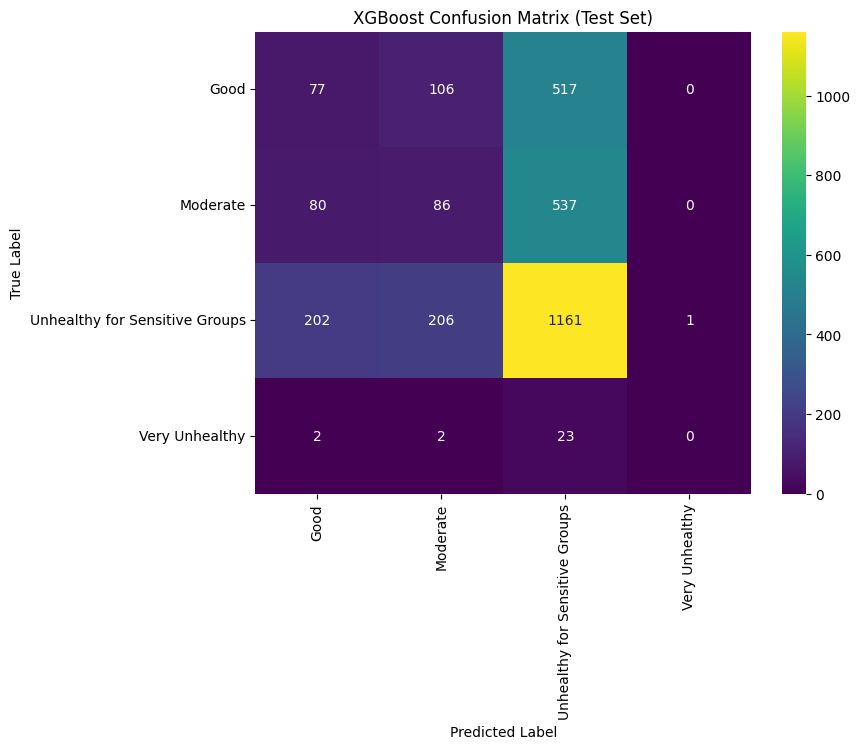

['tuned_xgboost_model.pkl']

In [21]:
#final model : xgboost
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import joblib

# Assume tuned_results_df and tuned_results from previous tuning code
# Define the best parameters for XGBoost
best_params = {'learning_rate': 0.3, 'n_estimators': 200}

# Instantiate the tuned XGBoost model
tuned_xgboost = XGBClassifier(
    **best_params,
    objective='multi:softmax',  # Multi-class classification
    num_class=len(np.unique(y_train)),  # Number of unique classes in AQI_Category
    eval_metric='mlogloss',  # Multi-class log loss
    use_label_encoder=False,  # Avoid label encoding warning
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
# Note: Assuming y_train is label-encoded (numerical); if not, use le.transform(y_train)
tuned_xgboost.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_test = tuned_xgboost.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
clf_report = classification_report(y_test, y_pred_test, output_dict=True)

print(f"\nFinal XGBoost Model Evaluation (Test Set):")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Test Classification Report:")
print(pd.DataFrame(clf_report).transpose())

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model (optional)
joblib.dump(tuned_xgboost, 'tuned_xgboost_model.pkl')
# Save the model for future use


In [26]:
print("Number of features in X_encoded:", len(X_encoded.columns))
print("Number of feature importances:", len(tuned_xgboost.feature_importances_))

Number of features in X_encoded: 16
Number of feature importances: 14


Original AQI_Category unique values:
 ['Unhealthy for Sensitive Groups' 'Good' 'Moderate' 'Very Unhealthy']

Label encoding mapping:
0 => Good
1 => Moderate
2 => Unhealthy for Sensitive Groups
3 => Very Unhealthy

Encoded AQI_Category unique values:
 [2 0 1 3]

X_train shape: (7000, 14)

y_train value counts:
 AQI_Category
2    3635
1    1672
0    1612
3      81
Name: count, dtype: int64

Sample of y_train with original labels:
['Unhealthy for Sensitive Groups' 'Good' 'Good' 'Good'
 'Unhealthy for Sensitive Groups']

AQI_Category data type: int64
Sample AQI_Category values:
 0    2
1    2
2    0
3    2
4    2
Name: AQI_Category, dtype: int64

Final XGBoost Model Evaluation (Test Set):
Test Accuracy: 100.00%
Test Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0    691.0
1                   1.0     1.0       1.0    717.0
2                   1.0     1.0       1.0   1557.0
3                   1.0     1.0       1.0     35.0


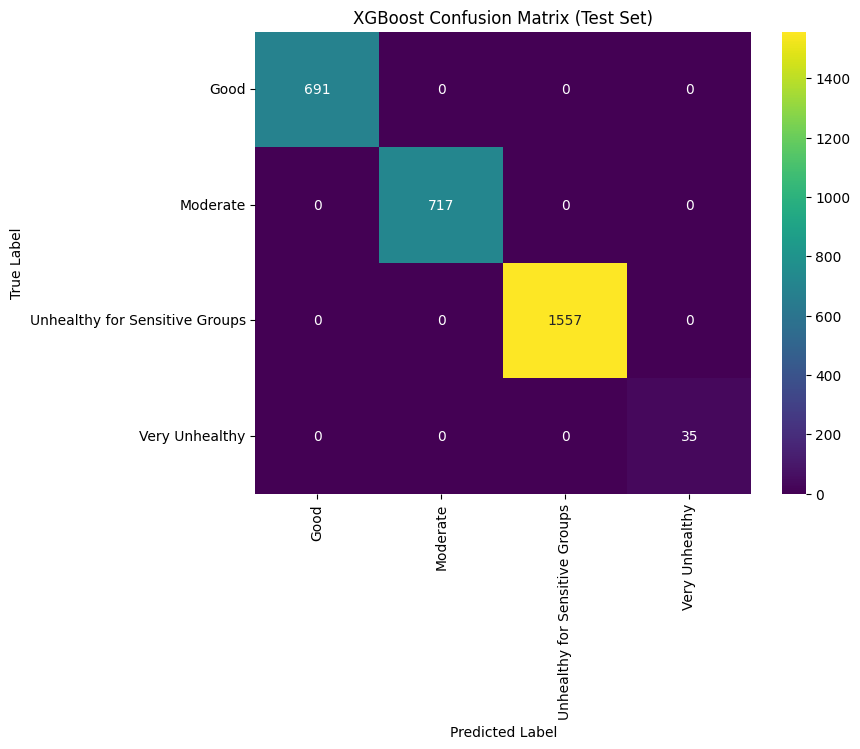


XGBoost Feature Importance:
                    Feature  Importance
6             NOx Emissions    0.686391
7                   NOx_AQI    0.312356
2               Temperature    0.000913
1            Age of Vehicle    0.000271
4              Air Pressure    0.000040
5             CO2 Emissions    0.000014
0               Engine Size    0.000012
3                  Humidity    0.000004
8          Vehicle Type_Car    0.000000
9   Vehicle Type_Motorcycle    0.000000
10       Vehicle Type_Truck    0.000000
11       Fuel Type_Electric    0.000000
12         Fuel Type_Hybrid    0.000000
13         Fuel Type_Petrol    0.000000

Model, LabelEncoder, and Scaler saved as 'tuned_xgboost_model.pkl', 'label_encoder.pkl', and 'scaler_all.pkl'


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Load data
df = pd.read_csv('vehicle_emission_dataset_filtered.csv')

print("Original AQI_Category unique values:\n", df['AQI_Category'].unique())

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the AQI_Category column
df['AQI_Category'] = le.fit_transform(df['AQI_Category'])

# Print the mapping of encoded labels to original categories
print("\nLabel encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i} => {label}")

# Verify the encoded AQI_Category values
print("\nEncoded AQI_Category unique values:\n", df['AQI_Category'].unique())

# Separate features and target
X = df.drop('AQI_Category', axis=1)
y = df['AQI_Category']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Print shapes and value counts
print("\nX_train shape:", X_train.shape)
print("\ny_train value counts:\n", y_train.value_counts())

# Map back encoded labels to original categories for verification
print("\nSample of y_train with original labels:")
print(le.inverse_transform(y_train.head()))

# Check data types and sample data
print("\nAQI_Category data type:", df['AQI_Category'].dtype)
print("Sample AQI_Category values:\n", df['AQI_Category'].head())

# Scale features
scaler_all = StandardScaler()
X_train_scaled = scaler_all.fit_transform(X_train)
X_test_scaled = scaler_all.transform(X_test)

# Convert scaled arrays back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_encoded.columns)



# Handle class imbalance with sample weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weight_dict = dict(zip(np.unique(y_train), class_weights))
sample_weights = [weight_dict[yi] for yi in y_train]

# Train the model
tuned_xgboost.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Evaluate on test set
y_pred_test = tuned_xgboost.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
clf_report = classification_report(y_test, y_pred_test, output_dict=True)

print(f"\nFinal XGBoost Model Evaluation (Test Set):")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Test Classification Report:")
print(pd.DataFrame(clf_report).transpose())

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': tuned_xgboost.feature_importances_
})
print("\nXGBoost Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Example: Predict on new data
"""
new_data = pd.DataFrame({
    'Vehicle_Type_Car': [...],
    'Fuel_Type_Diesel': [...],
    'Engine_Size': [...],
    'Age_of_Vehicle': [...],
    'Temperature': [...],
    'Humidity': [...],
    'Air_Pressure': [...],
    'NOx_Emissions': [...],
    'Engine_Size_Age': [...],
})
# Align and scale new data
new_data = pd.get_dummies(new_data, drop_first=True)
new_data = new_data.reindex(columns=X_encoded.columns, fill_value=0)
new_data_scaled = scaler_all.transform(new_data)
new_predictions = tuned_xgboost.predict(new_data_scaled)
new_pred_labels = le.inverse_transform(new_predictions)
print("\nPredictions for New Data:")
print(new_pred_labels)
"""

# Save model, LabelEncoder, and Scaler
joblib.dump(tuned_xgboost, 'tuned_xgboost_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler_all, 'scaler_all.pkl')
print("\nModel, LabelEncoder, and Scaler saved as 'tuned_xgboost_model.pkl', 'label_encoder.pkl', and 'scaler_all.pkl'")

In [32]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the saved model, LabelEncoder, and Scaler
tuned_catboost = joblib.load('tuned_xgboost_model.pkl')
le = joblib.load('label_encoder.pkl')
scaler_all = joblib.load('scaler_all.pkl')

# Print class mapping for reference
print("\nClass Mapping (LabelEncoder):")
for idx, class_name in enumerate(le.classes_):
    print(f"{idx}: {class_name}")


Class Mapping (LabelEncoder):
0: Good
1: Moderate
2: Unhealthy for Sensitive Groups
3: Very Unhealthy
